# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [4]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt

## Loading the dataset

In [6]:
# Import data files
from google.colab import drive
drive.mount('/content/drive')

df_path = "/content/drive/MyDrive/DS Course/used_device_data.csv"
df = pd.read_csv(df_path)

df.head()

Mounted at /content/drive


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

Data shape: (3454, 15)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price 

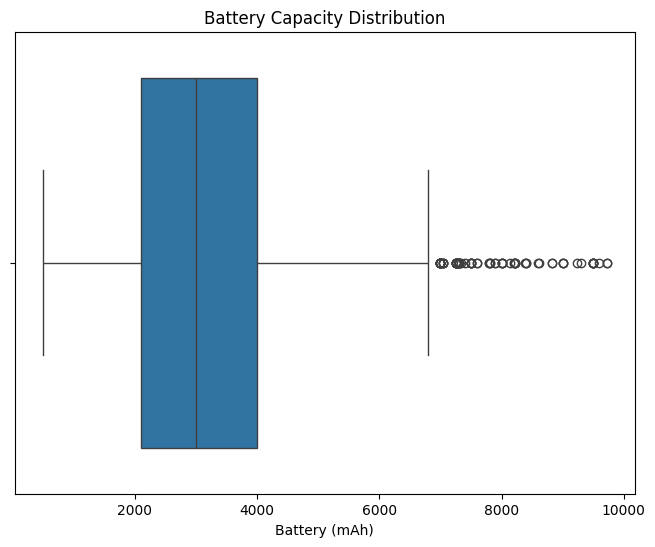

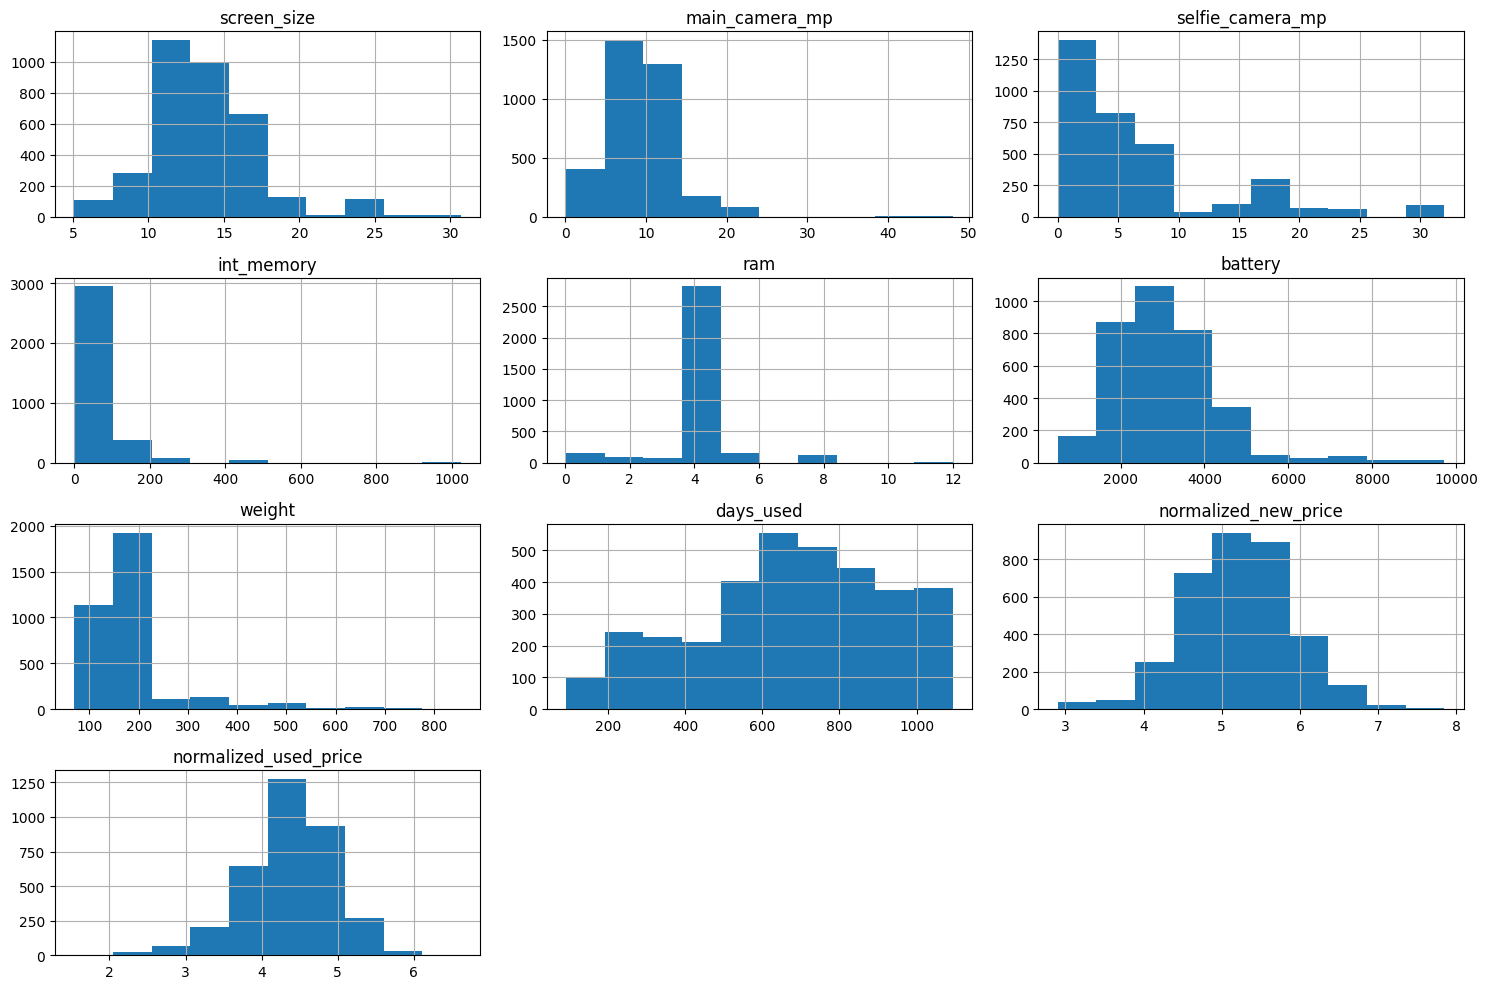

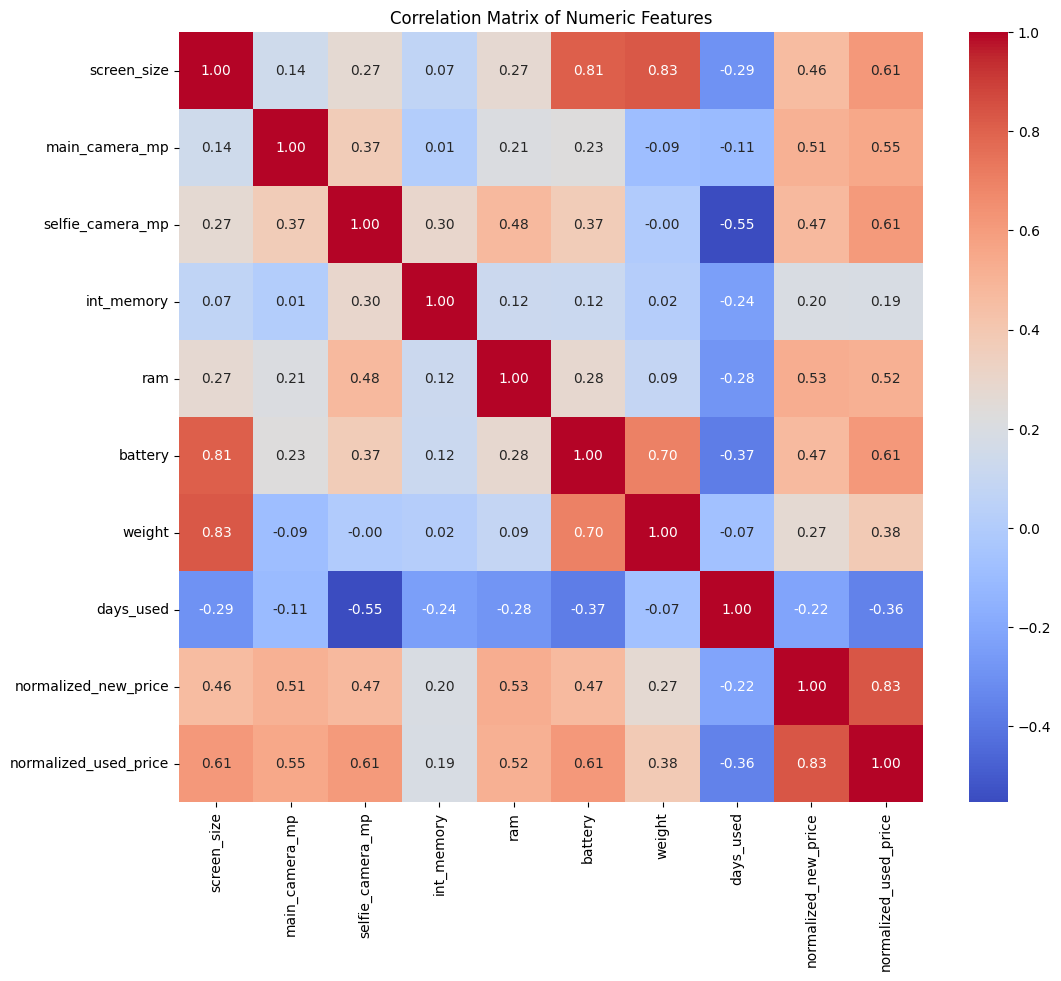

Final Shape of Data: (3454, 15)


In [7]:
# Basic Overview of the Data
print("Data shape:", df.shape)
print("\nData info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

# Check for Missing Values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing values (numerical with median, categorical with mode)
df.fillna({
    "main_camera_mp": df["main_camera_mp"].median(),
    "selfie_camera_mp": df["selfie_camera_mp"].median(),
    "int_memory": df["int_memory"].median(),
    "ram": df["ram"].median(),
    "battery": df["battery"].median(),
    "weight": df["weight"].median(),
}, inplace=True)

# Check for Duplicate Rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows, if any
df.drop_duplicates(inplace=True)

# Data Types and Consistency Check
print("\nData types of each column:")
print(df.dtypes)

# Summary Statistics for Numeric Features
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Unique Value Counts for Categorical Variables
categorical_columns = ['brand_name', 'os', '4g', '5g']
for col in categorical_columns:
    print(f"\nUnique value counts for {col}:")
    print(df[col].value_counts())

# Logical Consistency Checks
# For example: 'days_used' should be non-negative and 'release_year' within a realistic range
print("\nChecking for negative values in 'days_used':")
print(df[df['days_used'] < 0])
print("\nChecking 'release_year' values:")
print(df['release_year'].value_counts().sort_index())

# Visual Check for Outliers using Boxplots (Example: Battery Capacity)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['battery'])
plt.title('Battery Capacity Distribution')
plt.xlabel('Battery (mAh)')
plt.show()

# Distribution of Numeric Features
numeric_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
                   'ram', 'battery', 'weight', 'days_used', 'normalized_new_price', 'normalized_used_price']
df[numeric_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation Matrix to Check Relationships between Numeric Features
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Check final data status
print("Final Shape of Data:", df.shape)

Based upon this, we observe the following:
* Basic Structure:
We have 3454 rows with 16 columns

* Missing Values:
We observed some missing values, so we replaced them with common-sense choices.

* Duplicates:
We did not observe any duplicates, but put in a function to remove them as a best practice.

* Data Types and Consistency:
The data types of each row are as expected, with numeric columns cast either as float or int, and categorical columns as object.

* Summary Statistics:
  * The wide ranges in several numeric features (e.g., camera resolutions, internal memory, battery, weight) suggest that the dataset covers a diverse set of devices—from basic low-end models to high-end or tablet-like devices.
  * Many features have a median very close to the mean (e.g., screen size, RAM, normalized prices), indicating fairly symmetric distributions. However, features like internal memory and weight show substantial spread, due to having distinct device categories.
  * The summary of operating systems and connectivity (4G/5G) suggests that the market represented is predominantly Android, with most devices being older models (pre-2020) and not equipped with 5G, reflecting the typical used market inventory in 2021.

* Categorical Values:
By examining the unique counts for categorical variables such as brand_name, os, 4g, and 5g, we searched for any unexpected or inconsistent values. For instance, if there had been a typo in one of the brand names or an unexpected operating system entry, we could have detected and corrected it.

* Logical Consistency:
Checks on attributes like days_used and release_year help ensure that the values make sense (e.g., days_used should not be negative, and release_year should fall within a plausible range). We did not see any issues with the values of these columns.

* Outlier Detection:
The boxplot for battery capacity provide a visual cue to the presence of outliers. These outliers could be genuine extreme cases or errors that need further investigation, but we should be aware of them.

* Distribution of Numeric Features:
Histograms show whether the numeric features follow a normal distribution or are skewed. This can influence how we approach further analysis or modeling (e.g., whether we will need to apply transformations).

* Feature Relationships:
The correlation matrix gives us an overview of how the numeric attributes relate to each other. For example, a strong correlation between normalized_new_price and normalized_used_price might be expected, while unexpected correlations might indicate multicollinearity or data issues for us to be aware of when we are training our model later.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [8]:
# function to plot a boxplot and a histogram along the same scale.
"""
Boxplot and histogram combined

data: dataframe
feature: dataframe column
figsize: size of figure (default (15,10))
kde: whether to show the density curve (default False)
bins: number of bins for histogram (default None)
"""
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="aqua"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="aqua", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="yellow", linestyle="-"
    )  # Add median to the histogram

In [9]:
# function to create labeled barplots
"""
Barplot with percentage at the top

data: dataframe
feature: dataframe column
perc: whether to display percentages instead of count (default is False)
n: displays the top n category levels (default is None, i.e., display all levels)
"""
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

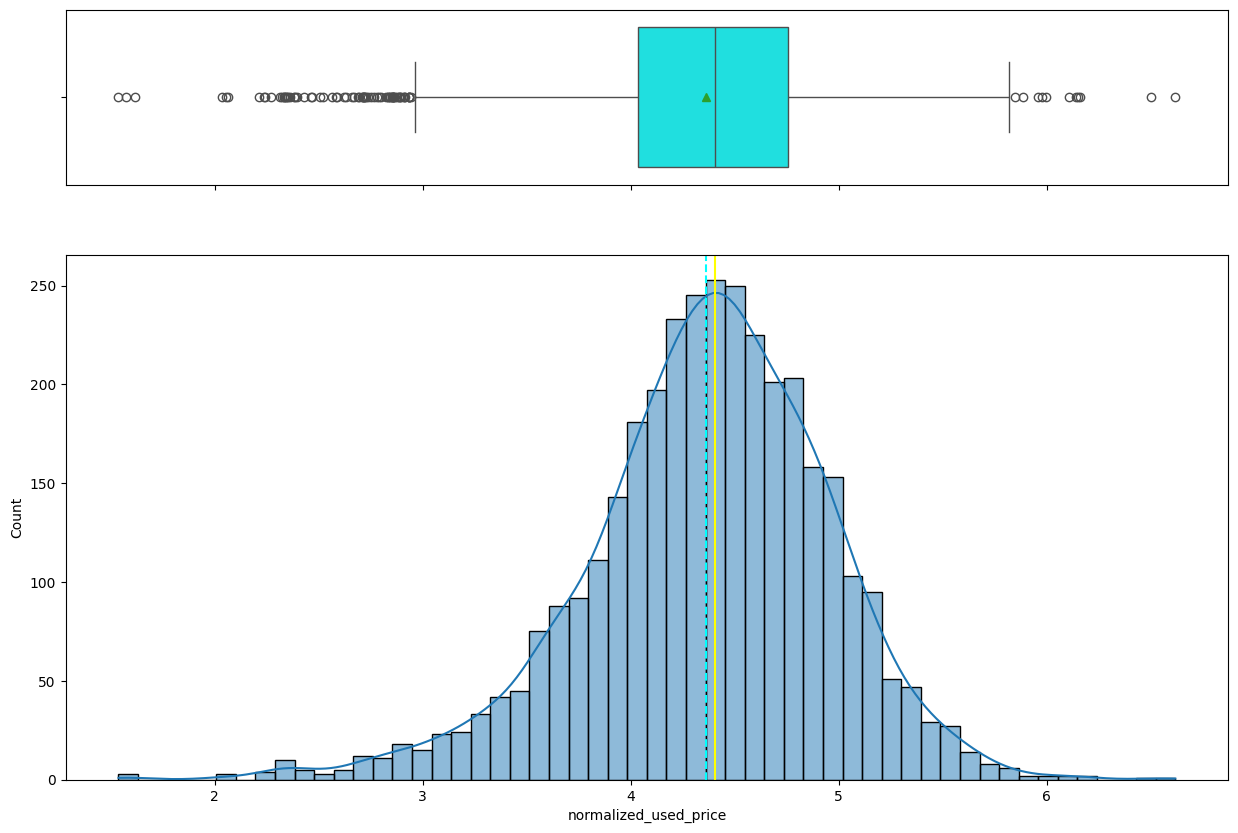

In [10]:
histogram_boxplot(df, "normalized_used_price")

Distribution Shape:

* The histogram indicates that the used prices are mostly concentrated around the central values, with an only slightly skewed distribution.

* Overall the distribution is narrow, suggesting that used device prices are relatively consistent.

Boxplot Insights:

* The boxplot shows many outliers, especially on the low end of the range.

**`normalized_new_price`**

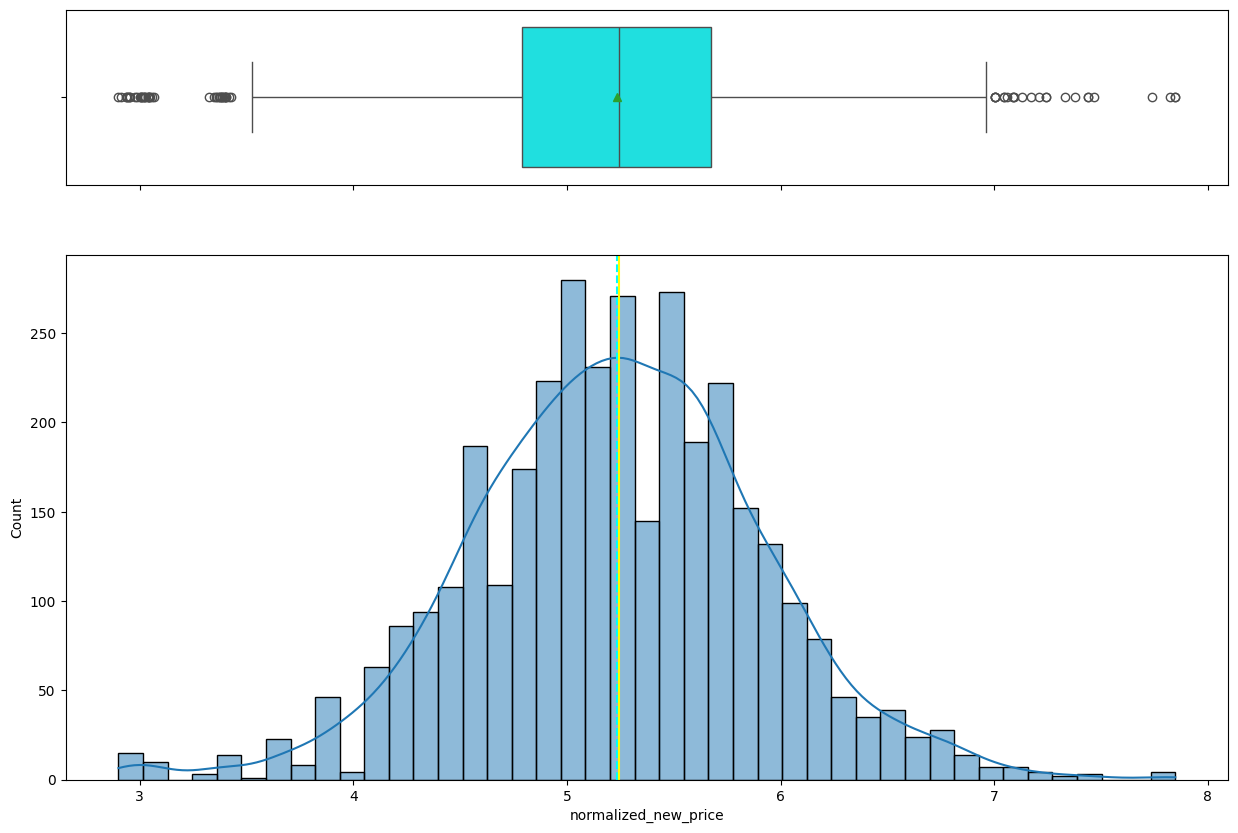

In [11]:
histogram_boxplot(df, 'normalized_new_price')

Distribution Shape:

* Similar to the used price, the new price distribution is concentrated around the median, with a nearly symmetric appearance.

* There might be a slight skew depending on a few high-end devices, but generally, the spread is moderate.

Boxplot Insights:

* The boxplot reveals a few outliers, but also indicates that most new prices are consistent with the central tendency.

**`screen_size`**

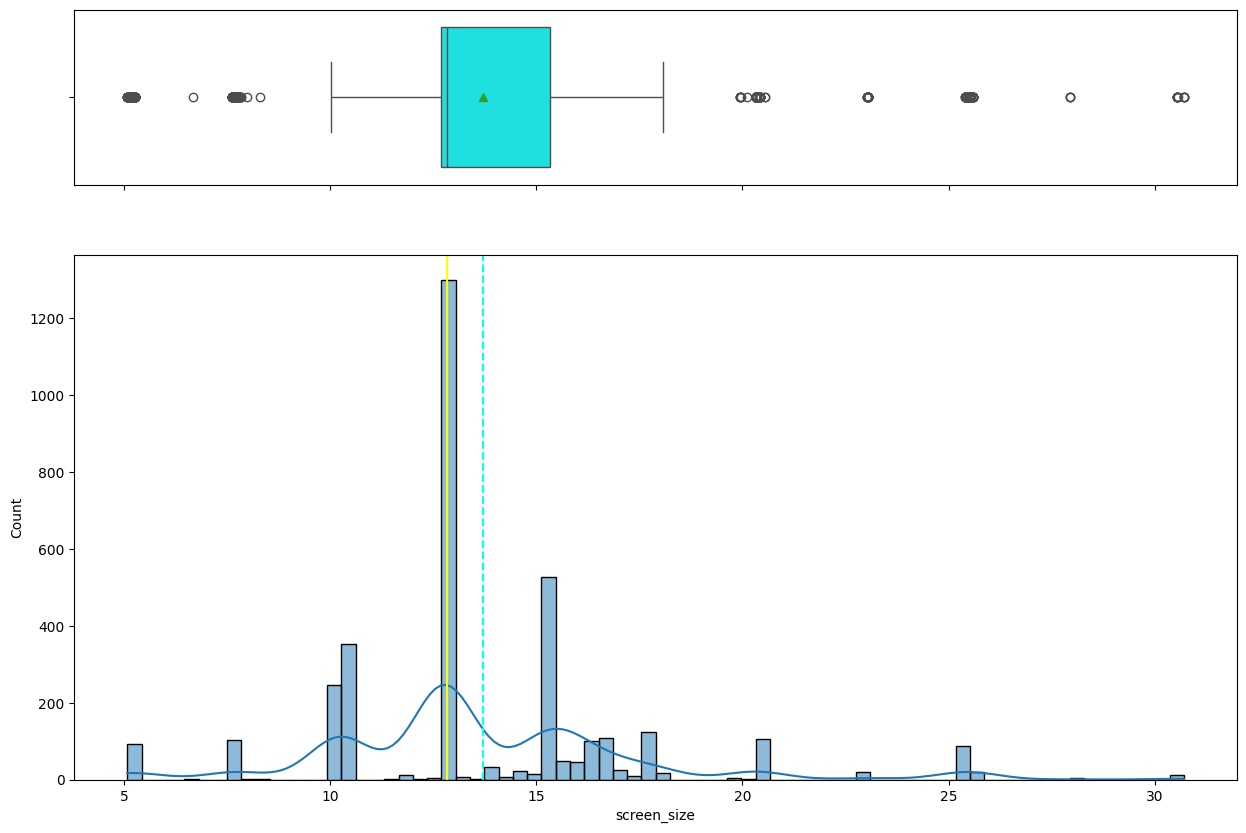

In [12]:
histogram_boxplot(df, 'screen_size')

Distribution Shape:

* The histogram is multi-modal, showing a wide array of screen sizes.
* There appears to be a long right tail, indicating that while most devices are relatively small, there are a few with much larger screens (likely tablets or larger phablets).

Boxplot Insights:
* The boxplot confirms the presence of outliers on the high end, which aligns with the long right tail observed in the histogram.

**`main_camera_mp`**

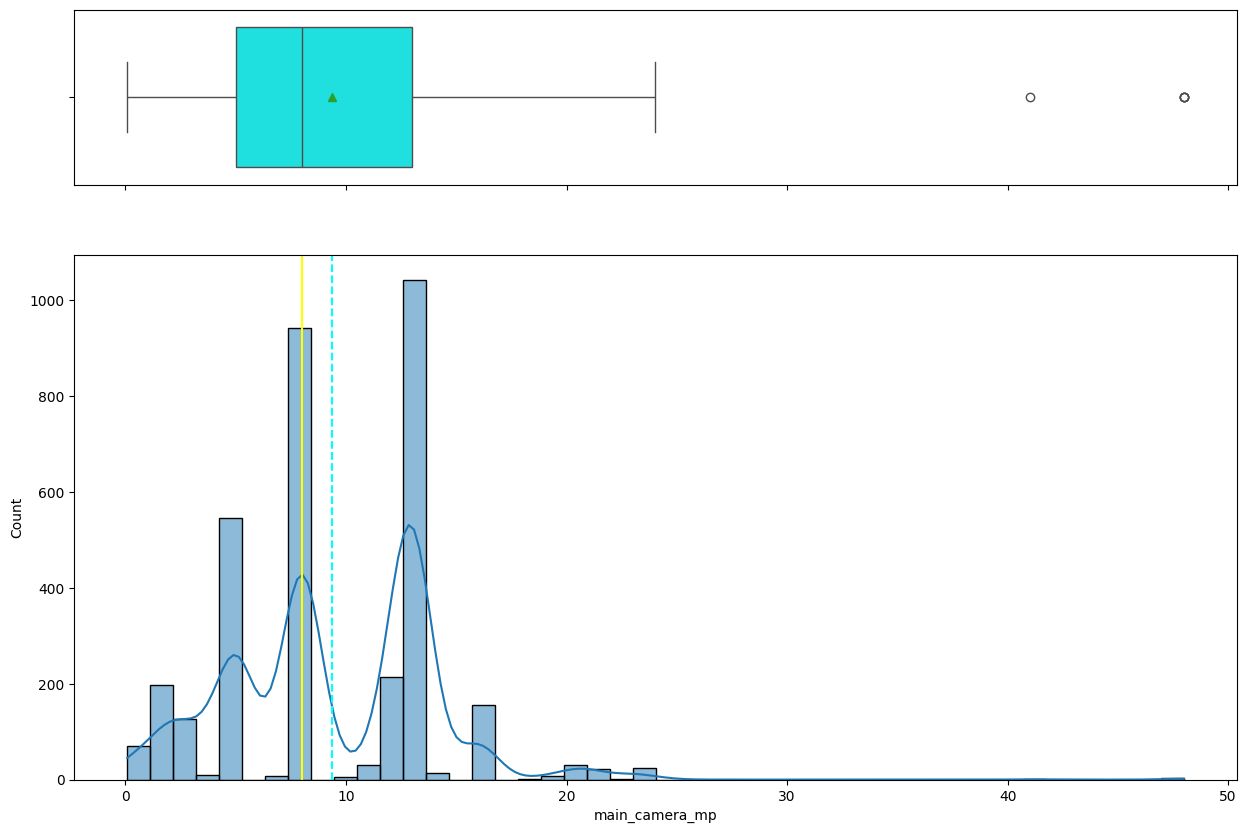

In [13]:
histogram_boxplot(df, 'main_camera_mp')

Distribution Shape:

* The histogram shows a concentration of devices around lower MP values, but with a tail extending to high values.

* This suggests a right-skewed distribution where most devices have modest main cameras, while some high-end models feature much higher resolutions.

Boxplot Insights:

* The boxplot highlights several high-value outliers, reinforcing the idea of a few premium models with exceptional main camera specifications.

**`selfie_camera_mp`**

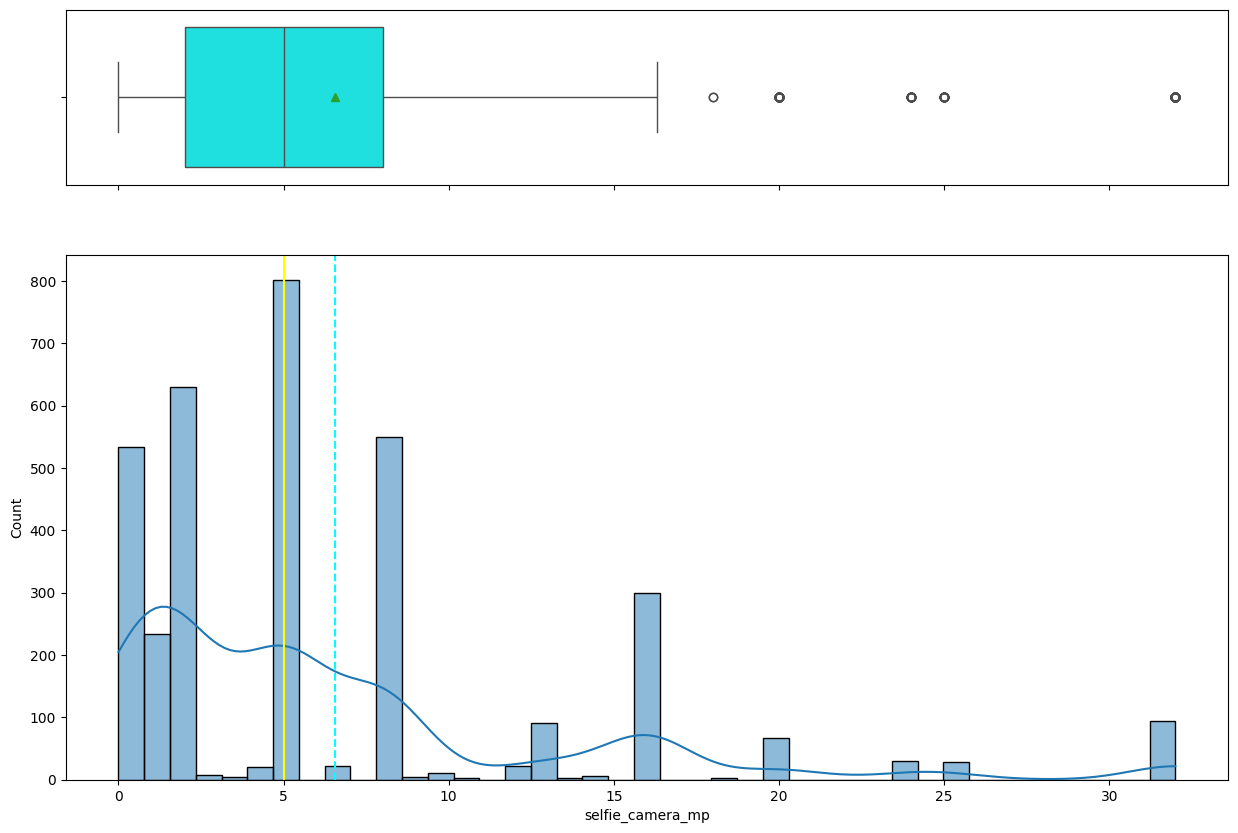

In [14]:
histogram_boxplot(df, 'selfie_camera_mp')

Distribution Shape:

* The majority of devices tend to have selfie cameras with lower resolutions (around 0 to 8 MP), but there is a long tail toward higher values, indicating some devices with very high selfie camera resolutions.

* This right-skewed distribution suggests that while most devices are basic in this regard, a subset offers advanced selfie features.

Boxplot Insights:

* Outliers on the high end are evident, pointing to the presence of high-resolution selfie cameras in a few devices.

**`int_memory`**

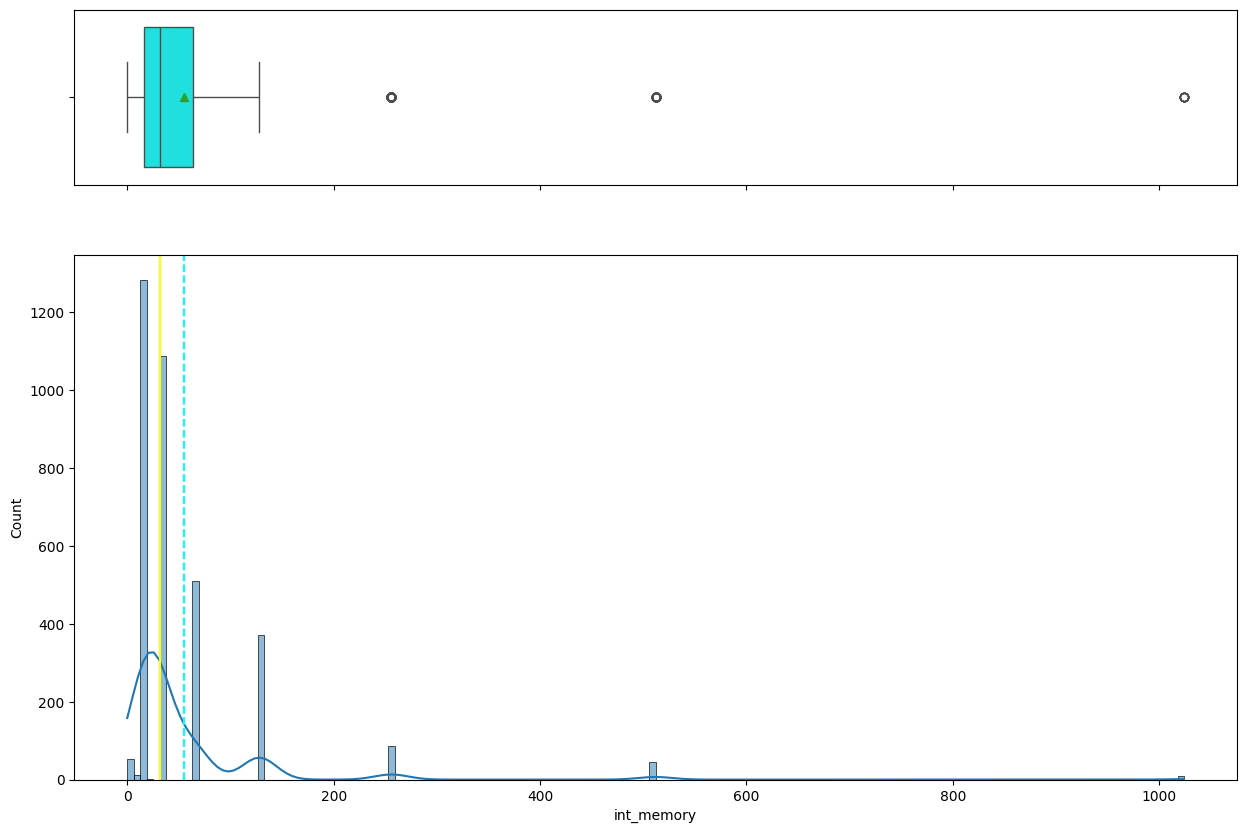

In [15]:
histogram_boxplot(df, 'int_memory')

Distribution Shape:

* The histogram shows that a large number of devices have relatively modest internal memory (around 16–64 GB), but there is a long right tail, indicating that some devices come with very high storage capacity (possibly tablets or flagship smartphones).

Boxplot Insights:

* The boxplot clearly indicates a spread with several high-value outliers, underscoring the wide variability in storage among devices.

**`ram`**

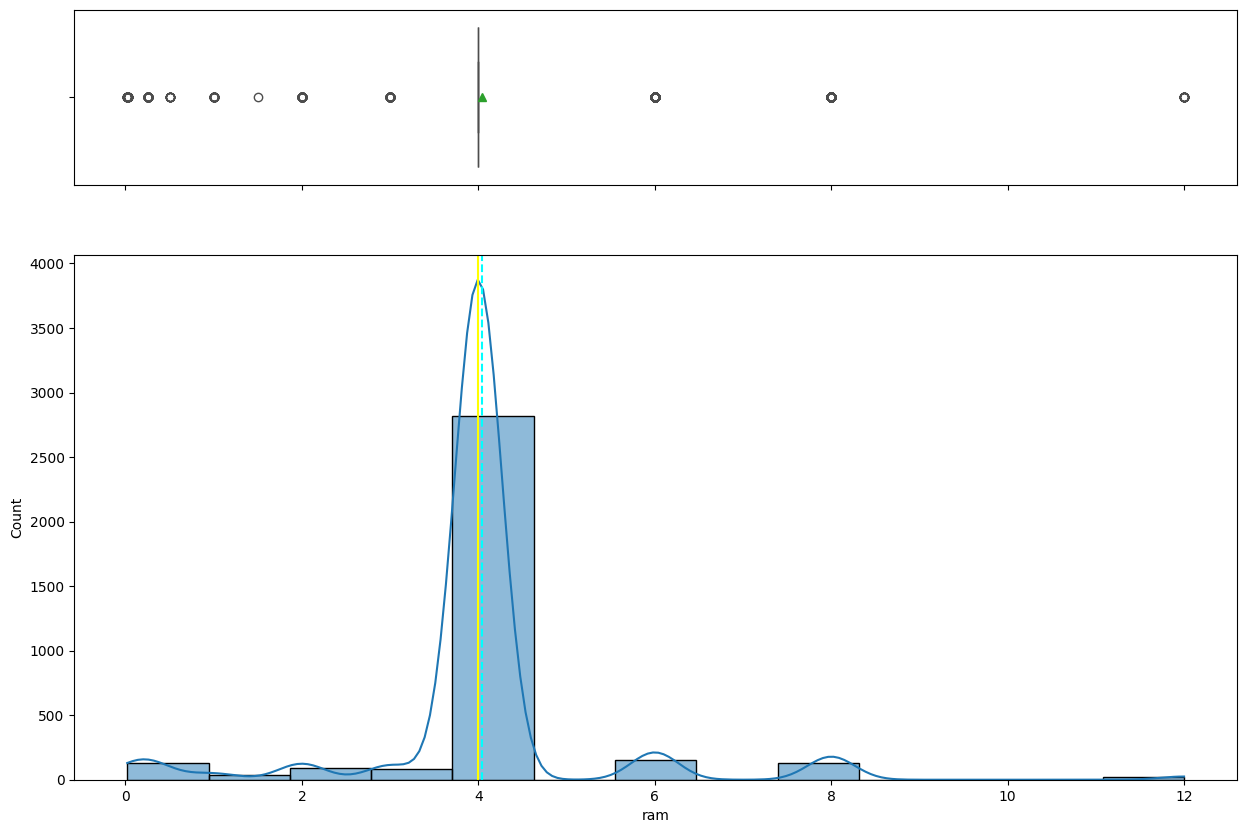

In [16]:
histogram_boxplot(df, 'ram')

Distribution Shape:

* The histogram suggests a concentration of devices around 4 GB, with relatively fewer devices having very low or very high RAM values.

* The distribution appears fairly symmetric or only mildly skewed, indicating a common standard in RAM for most devices.

Boxplot Insights:

* The boxplot has a very narrow band, reinforcing the observation that most devices tend to cluster around a similar RAM value.

**`weight`**

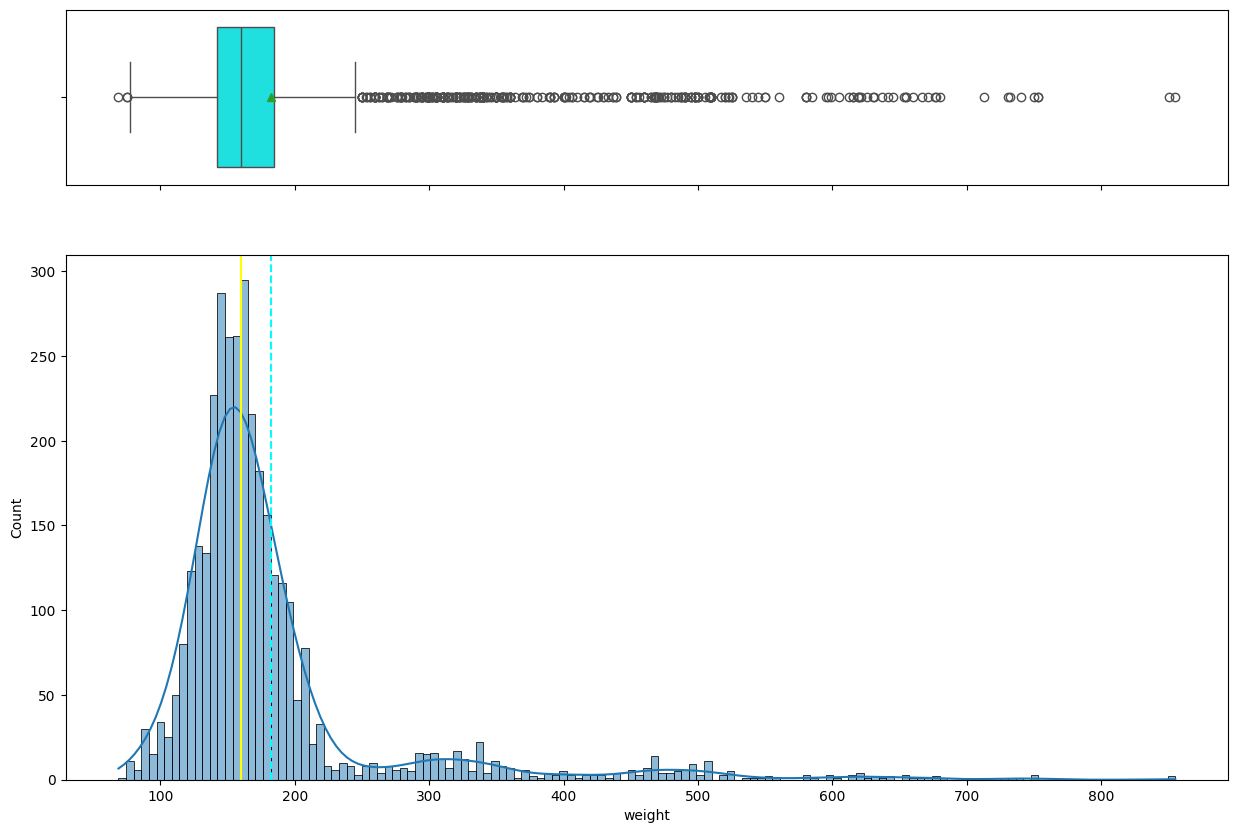

In [17]:
histogram_boxplot(df, 'weight')

Distribution Shape:

* The histogram reveals that most devices are relatively light (clustered around 150–200 grams), but there is a right-skewed tail where a few devices are significantly heavier—likely reflecting differences between compact smartphones and larger tablets.

Boxplot Insights:

* Outliers on the upper end of the boxplot confirm that while the majority are lightweight, there are some devices with much higher weight.

**`battery`**

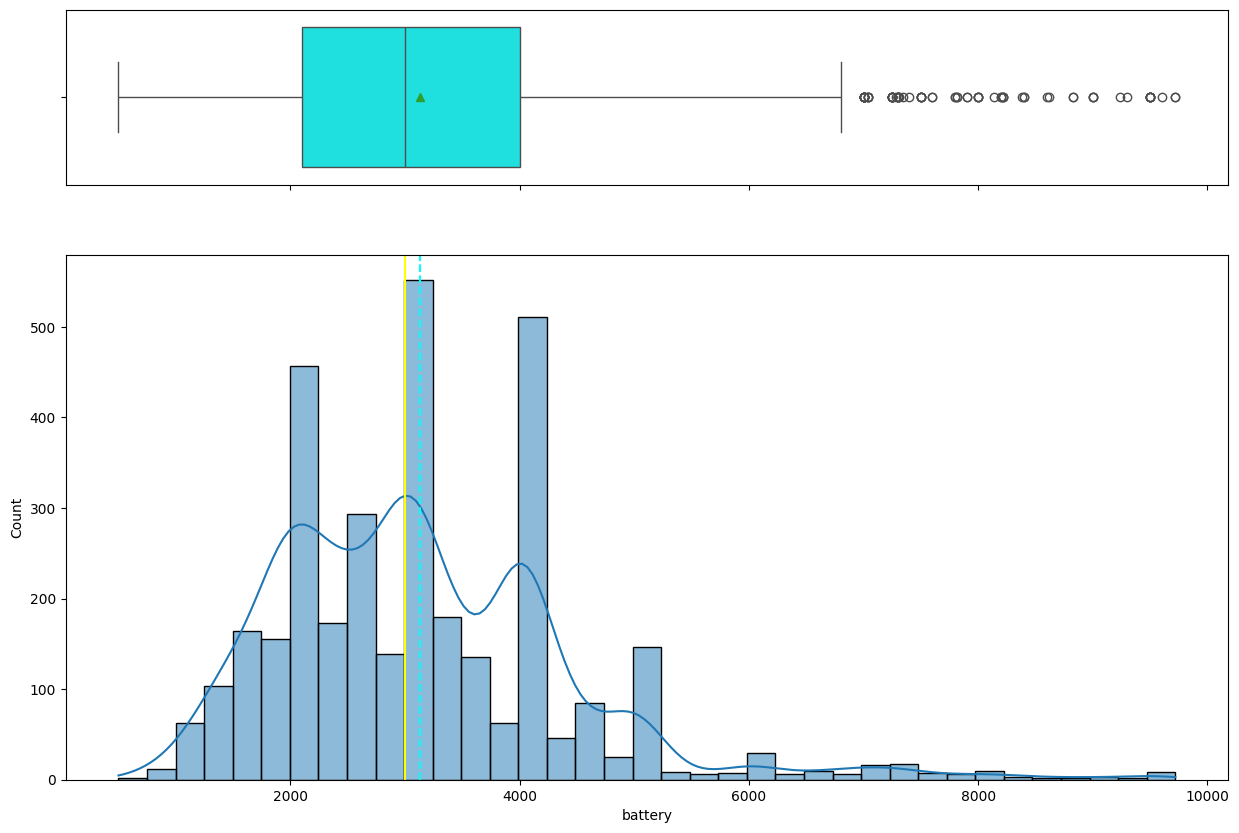

In [18]:
histogram_boxplot(df, 'battery')

Distribution Shape:

* The histogram indicates that while many devices fall around a central battery capacity (near 3000 mAh), there is a right tail, suggesting that a subset of devices features very high battery capacities.

Boxplot Insights:

* The boxplot shows a number of outliers on the high end, reinforcing the idea that some devices (often tablets or rugged smartphones) have exceptionally high battery capacities.

**`days_used`**

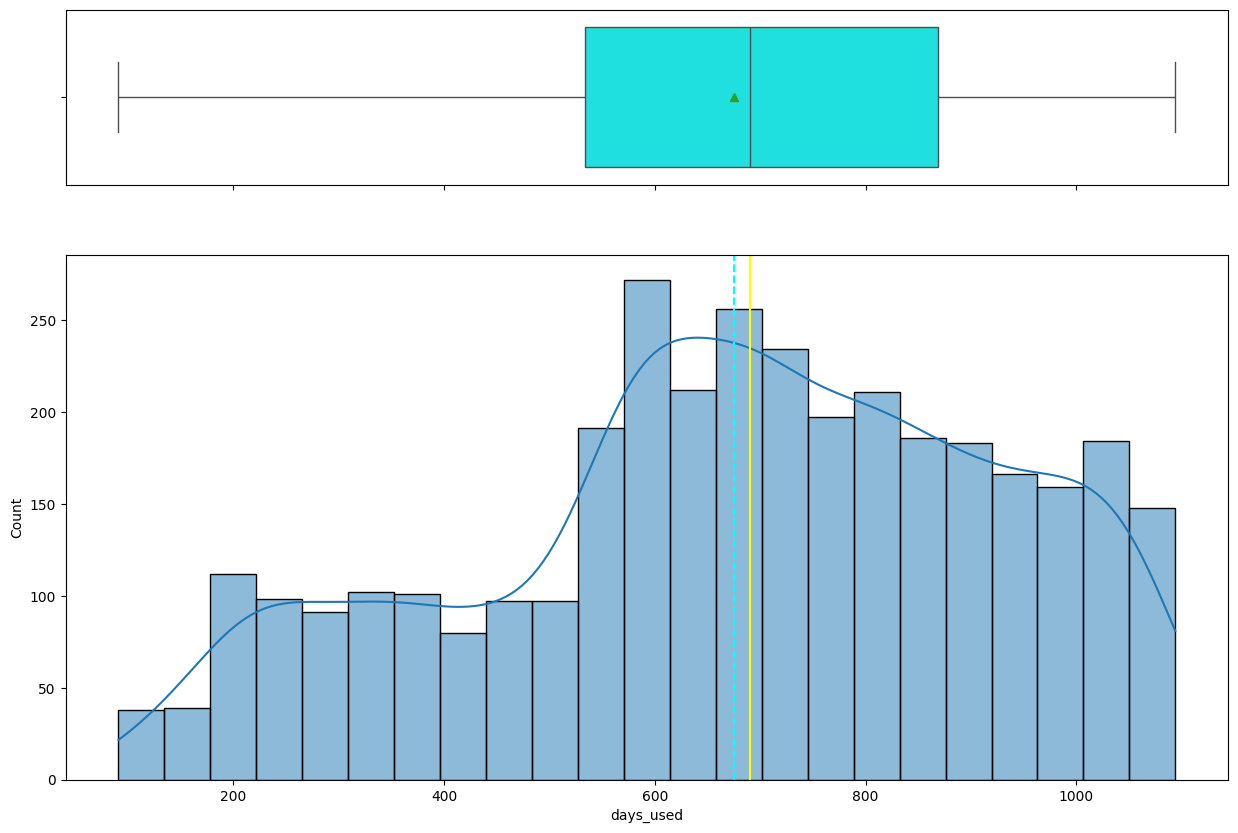

In [19]:
histogram_boxplot(df, 'days_used')

Distribution Shape:

* The histogram suggests that most devices have been used for roughly 2 years (around 690 days), with a somewhat symmetric or mildly skewed distribution.

* There isn’t a pronounced tail in either direction, indicating a fairly typical duration of usage.

Boxplot Insights:

* The boxplot shows that while there are some variations, the majority of devices fall within a consistent range of usage days.

**`brand_name`**

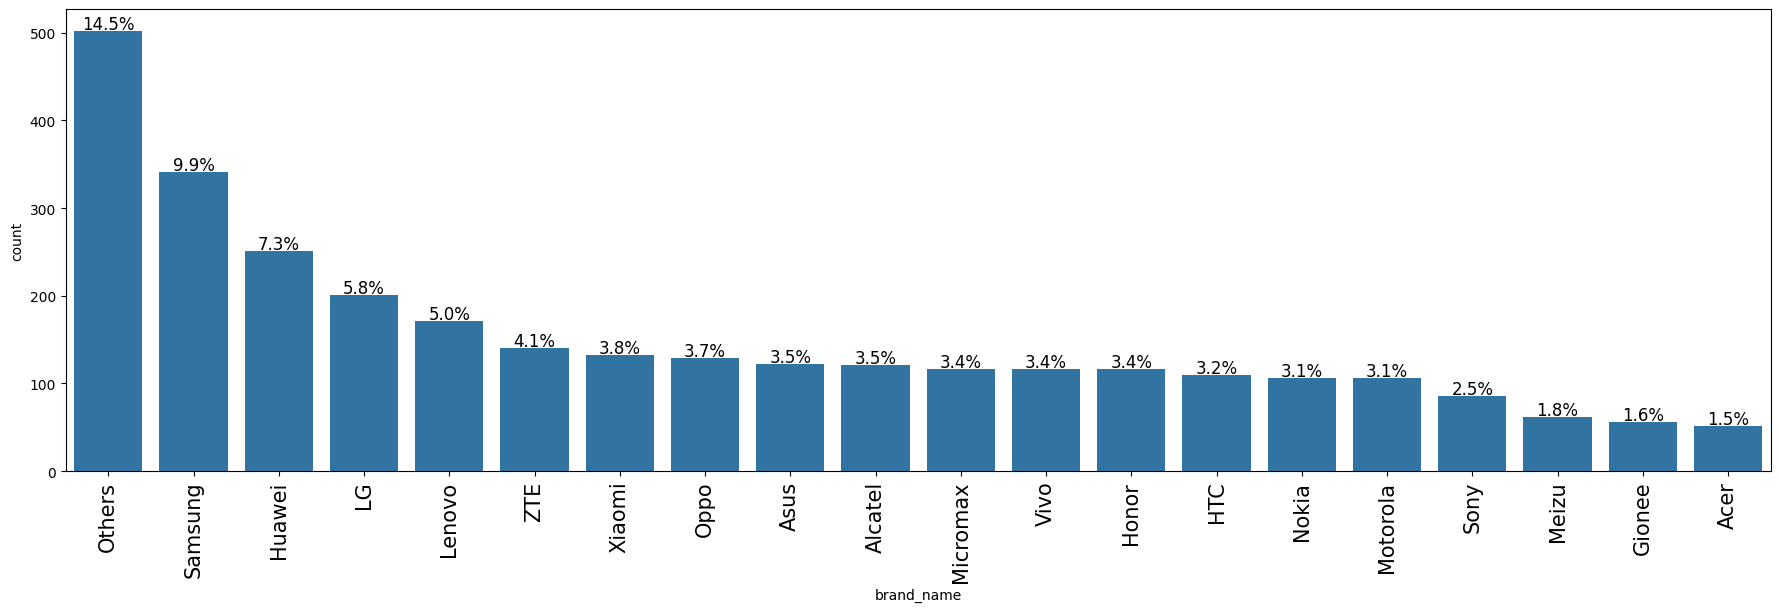

In [20]:
labeled_barplot(df, "brand_name", perc=True, n=20)

Dominant Brands:
* The barplot clearly shows a wide spread of brands in the used device data.

Long Tail of Brands:
* The distribution typically displays a long tail where many brands have only a few entries. This suggests that the market is diverse.

**`os`**

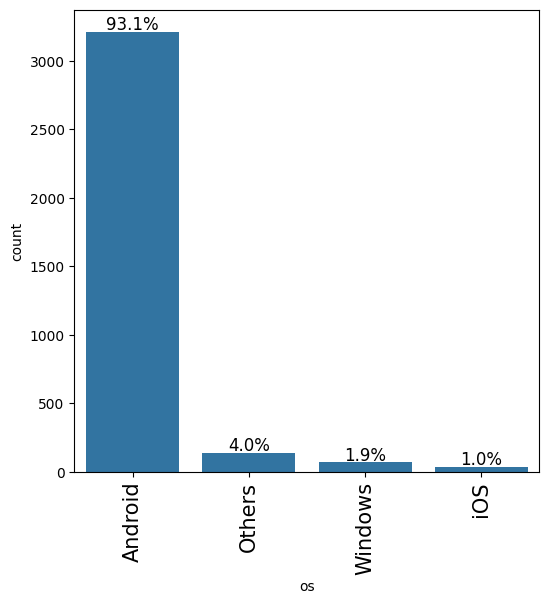

In [21]:
labeled_barplot(df, 'os', perc=True)

Dominance of Android:
* 93.1% of devices in the dataset run on Android.

Smaller Representation for Other OS:
* The remaining operating systems (such as iOS and any others present) have much lower counts. This indicates that non-Android devices represent a small portion of our inventory.

Market Implications:
* The strong dominance of Android could be due to factors like broader availability, lower initial costs, or higher turnover in the used market. This information can be useful when analyzing market trends, pricing strategies, or even tailoring marketing efforts for used devices.

**`4g`**

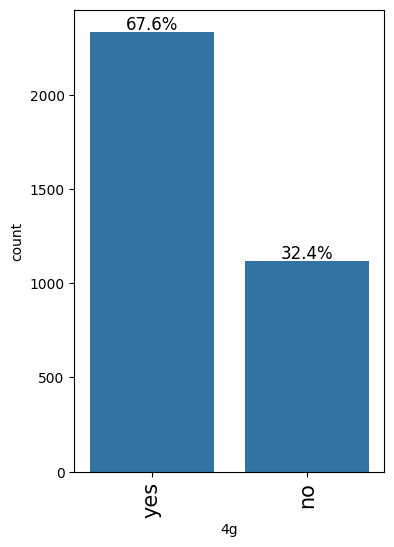

In [22]:
labeled_barplot(df, '4g', perc=True)

Inventory Composition:
* The barplot shows that a large portion of our inventory consists of devices that support 4G connectivity. The "yes" category far outweighs the "no" category, indicating that most devices we hold are 4G-enabled.

Product Offering Strategy:
* Since our inventory is dominated by 4G devices, it suggests that our procurement or stocking strategy has focused on devices with modern connectivity standards. This may reflect customer demand for devices that offer better performance and faster data speeds.

Potential Gaps:
* The relatively small number of non-4G devices indicates that our inventory includes only a niche segment of older or less connected devices. If we aim to cater to customers seeking legacy or budget options, we might consider whether this smaller segment meets that demand.

Implications for Service and Support:
* With a majority of 4G-enabled devices, our support services, marketing, and after-sales efforts should be optimized for 4G technology. It also means that our inventory is largely aligned with current connectivity standards, which may be a competitive advantage in terms of resale value and customer satisfaction.

Inventory Composition:
* The barplot shows that the vast majority of our inventory is comprised of devices without 5G connectivity. The "no" category is much larger than the "yes" category.

Stocking Strategy Implications:
* This indicates that our current procurement strategy largely focuses on devices that are 4G or below, suggesting that we have fewer devices equipped with the latest 5G technology.

* This could be due to market availability or our target demographic’s demand.

Customer Considerations:
* Customers looking for 5G-capable devices will find only a small segment of our inventory fulfilling that requirement.

* If demand for 5G increases, we may need to adjust our sourcing to include more 5G-enabled devices.

Future Strategic Decisions:
* The low representation of 5G devices may signal an opportunity: if market trends continue to shift towards 5G, expanding our inventory in that area could attract a new segment of customers. Conversely, if our current customer base prefers affordability over the latest technology, maintaining a 5G-light inventory might be a deliberate strategy.

**`5g`**

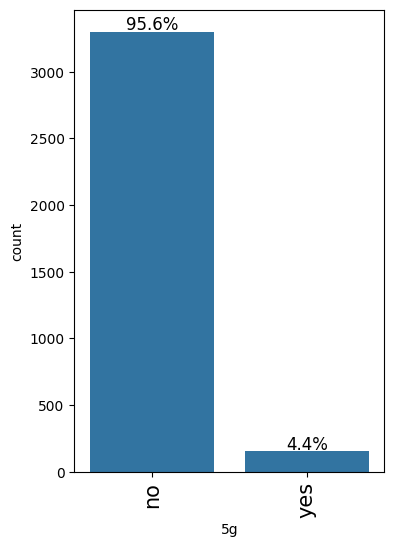

In [23]:
labeled_barplot(df, '5g', perc=True)

**`release_year`**

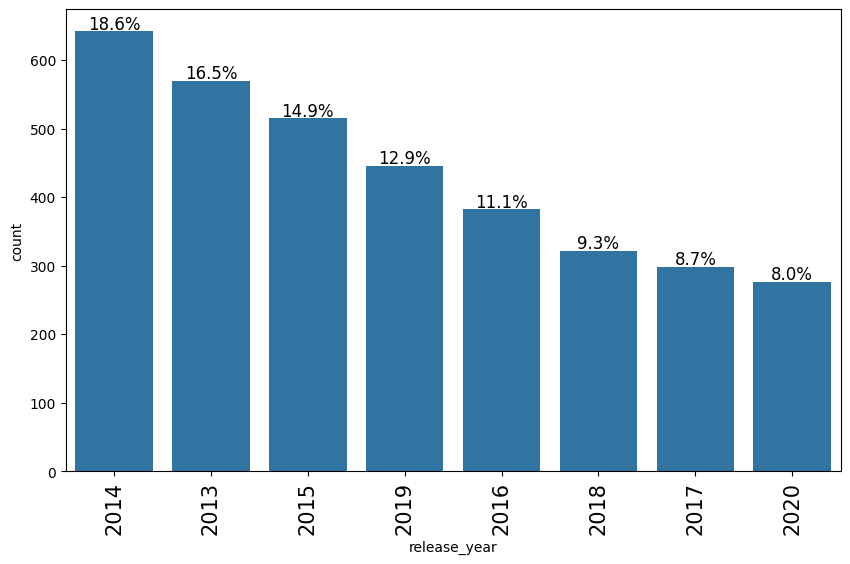

In [24]:
labeled_barplot(df, 'release_year', perc=True)

Distribution Shape:

* The histogram shows that devices are mostly concentrated in the mid-2010s, with fewer devices from earlier or later years.

* The distribution appears fairly symmetric given the narrow range, reflecting a typical age range for used/refurbished devices.

### Bivariate Analysis

**Correlation Check**

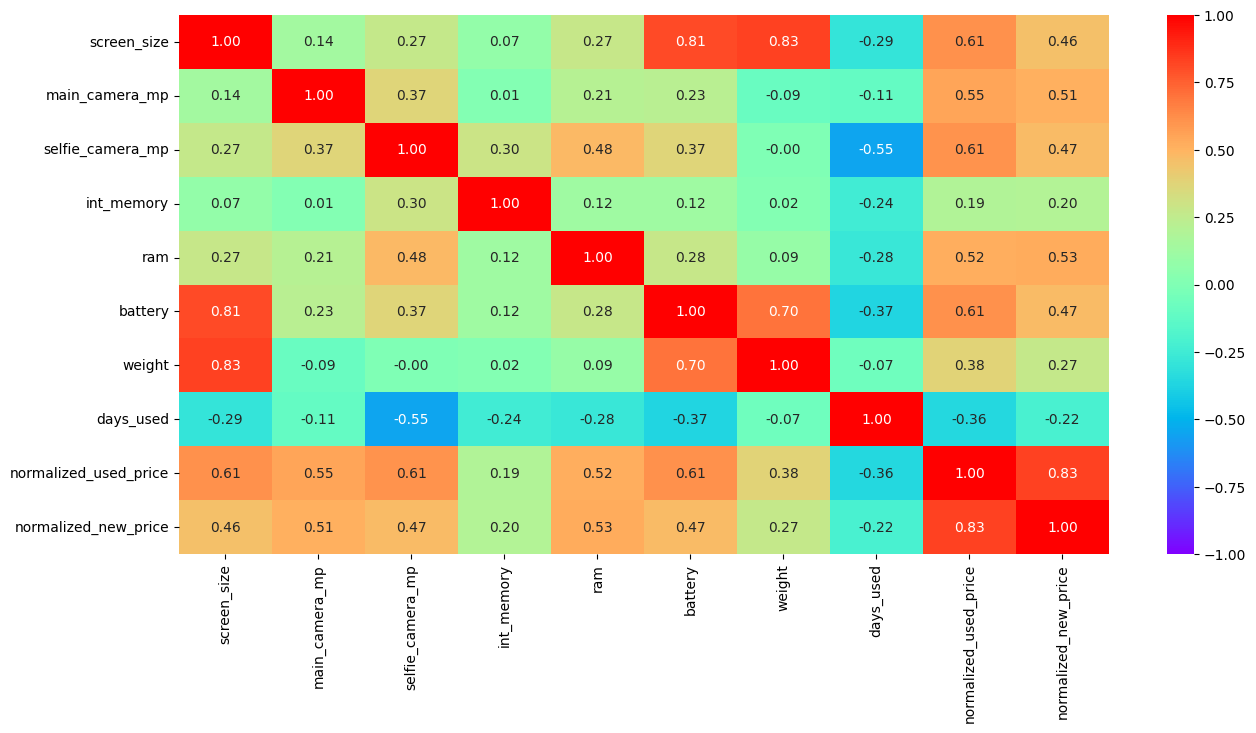

In [25]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="rainbow"
)
plt.show()

Strong Relationship Between Prices:
* The most striking observation is that normalized_used_price is very highly correlated with normalized_new_price. This suggests that the new price is a dominant factor in determining the used price, as expected.

Temporal Influence:
* The release_year shows a moderate correlation with the used price. Typically, newer devices tend to command higher prices in the used market, while older devices depreciate more over time.

Usage and Depreciation:
* Days_used appears to have a negative (or at least inverse) relationship with the used price, indicating that the longer a device has been used, the lower its market value, as expected.

Hardware Specifications:
* Other technical attributes such as battery, RAM, and internal memory (ROM) show weaker correlations with the used price compared to the new price. This suggests that while these specifications matter, their influence on the resale price is less pronounced than that of the new price or release year.

Inter-relationships Among Features:
* The heatmap also reveals moderate to strong correlations among certain hardware features (for example, between internal memory and new price or between battery capacity and weight). These interdependencies may indicate that higher-end devices tend to have better specifications across multiple dimensions.

Overall, the heatmap underscores that the primary driver of a used device's value is its original new price, with release year and usage time also playing significant roles. The other technical specifications, while important for performance, appear to have a more subtle effect on pricing in the used market.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [26]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

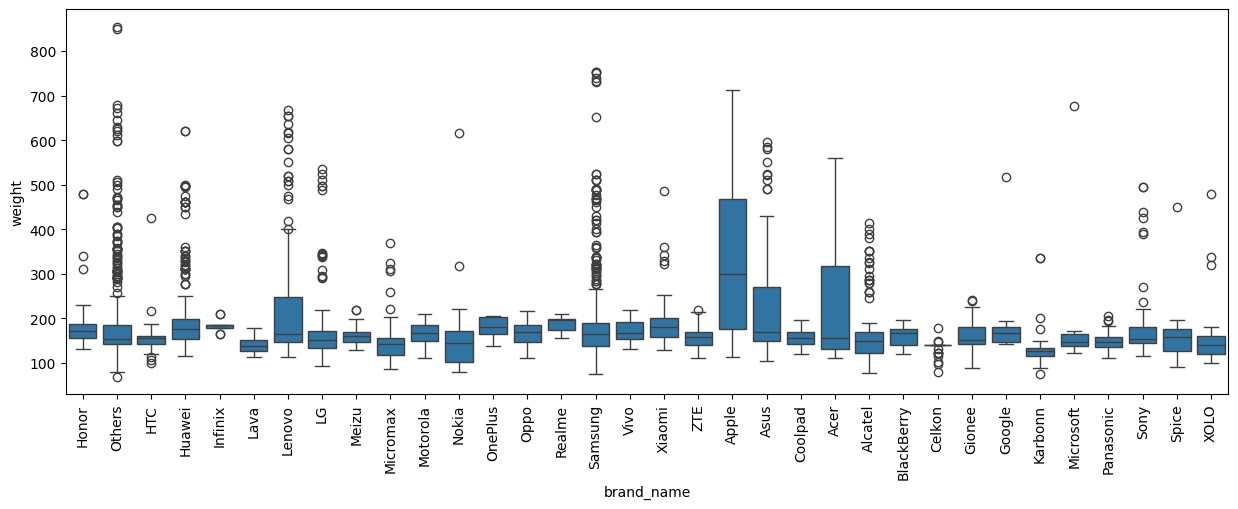

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

**Insights**:

Variability Across Brands:
* Some brands show a very tight interquartile range, indicating that the majority of their devices have similar weights. In contrast, other brands display a wide spread, suggesting a more diverse product range (for example, from lightweight smartphones to heavier tablets).

Median Weight Differences:
* The median weight differs across brands, with some brands consistently producing lighter devices, while others have a higher median weight.

Presence of Outliers:
* For certain brands, the boxplot shows outliers on the higher end of the weight scale. These outliers might represent high-end or specialty models (such as tablets) that are heavier than the typical device from that brand.

Skewness in Distribution:
* In some cases, the median is not centered within the box, indicating a skewed distribution. For instance, if the median is closer to the lower quartile, it might suggest a right-skew (a few very heavy devices pulling the upper values up).

Overall, the boxplot suggests that there is significant variation in device weights across different brands, likely reflecting different product strategies and target market segments.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [28]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

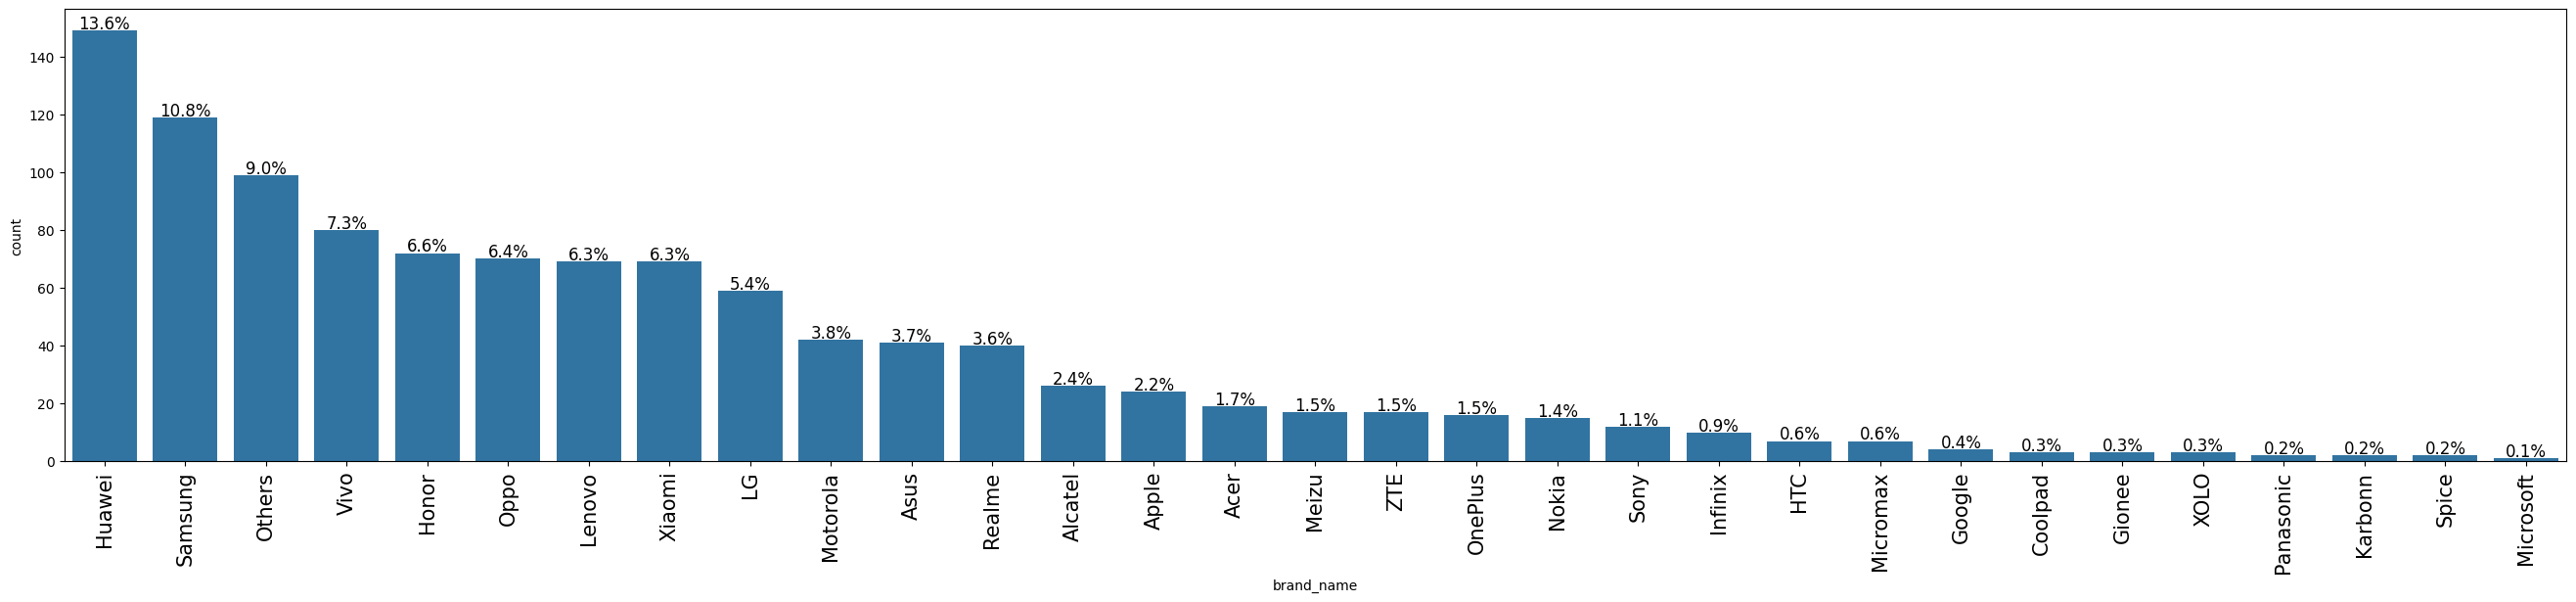

In [29]:
# Call the function on the 'brand_name' column for the large screen subset
labeled_barplot(df_large_screen, 'brand_name', perc=True)

The barplot of brand names reveals several important points:

* Dominant Brands:
A few brands clearly dominate the inventory, as indicated by significantly taller bars. This suggests that the majority of devices come from a limited number of manufacturers.

* Long Tail Distribution:
Many brands appear with much smaller counts, indicating a long tail. This means that while the market includes a variety of brands, most have a relatively low representation compared to the top few.

* Inventory Concentration:
The disparity in bar heights implies that our inventory is concentrated in certain brands. This could reflect market trends, procurement strategies, or consumer preferences that favor these leading brands.

* Potential for Niche Offerings:
The presence of many brands with lower counts may point to niche segments that could be explored further for specialized customer needs.

Overall, the barplot suggests that while there is diversity in the brands represented, a small number of brands overwhelmingly dominate our inventory.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [30]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

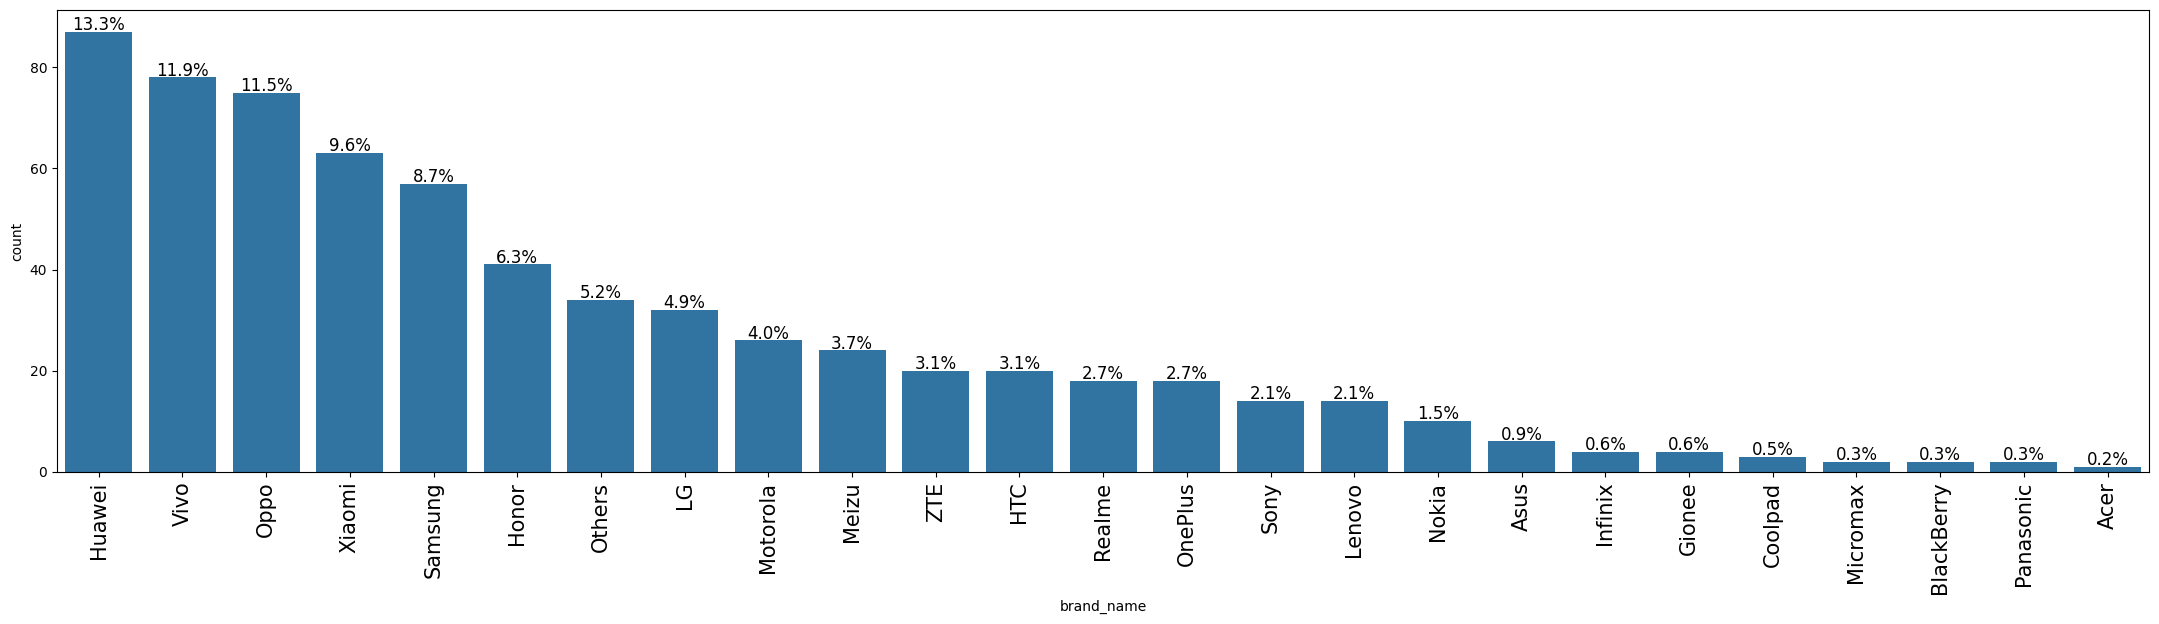

In [31]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True)

The barplot for brands that offer devices with selfie cameras above 8 MP reveals several key insights:

* Selective Offering:
Only a subset of brands appears in this plot, indicating that high-resolution selfie cameras are not standard across all manufacturers. This suggests that only certain brands emphasize advanced front-camera features.

* Dominant Brands in High-Spec Selfies:
A few brands stand out with significantly higher counts, meaning they not only offer high-resolution selfie cameras but do so in a larger share of their models. This points to a strategic focus on premium selfie capabilities for those brands.

* Market Positioning:
The distribution suggests that high-resolution selfie cameras are likely used as a key differentiator in competitive segments.

Overall, the barplot indicates that in our inventory, only a limited group of brands has invested in offering devices with selfie cameras greater than 8 MP, with a few dominant players leading this category.

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [32]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

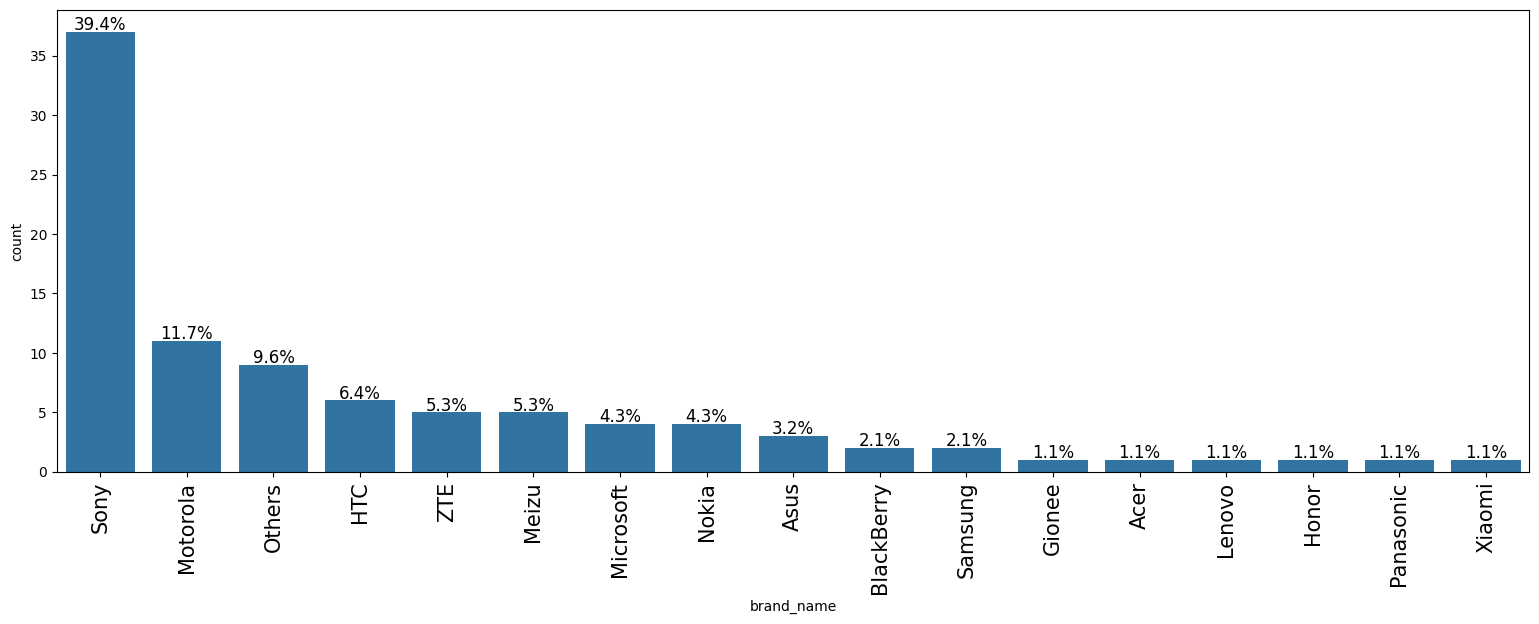

In [33]:
labeled_barplot(df_main_camera, "brand_name", perc=True)

Insights:

* Selective Brand Representation:
Only a subset of brands produces devices with rear cameras above 16 MP. This indicates that high-resolution rear cameras are not a standard feature across all manufacturers; rather, they are typically reserved for higher-end or flagship models.

* Dominance by Leading Brands:
The barplot shows that one or two brands have a significantly larger count of high-resolution rear camera devices. These dominant brands likely emphasize advanced photography and videography features, positioning their products in a premium segment.

* Market Differentiation:
The presence of high-resolution rear cameras in only certain brands suggests that these brands are targeting consumers who prioritize camera performance.

* Strategic Inventory Implications:
For our inventory, the concentration of >16 MP rear camera devices among a few brands could signal a niche opportunity. Emphasizing these models might attract customers interested in superior photography capabilities, while other brands might serve a different market segment.

Overall, the analysis of the barplot indicates that high-resolution rear cameras (>16 MP) are predominantly offered by a select group of brands, underlining a strategic differentiation in product offerings and targeting a premium market segment.

**Let's see how the price of used devices varies across the years.**

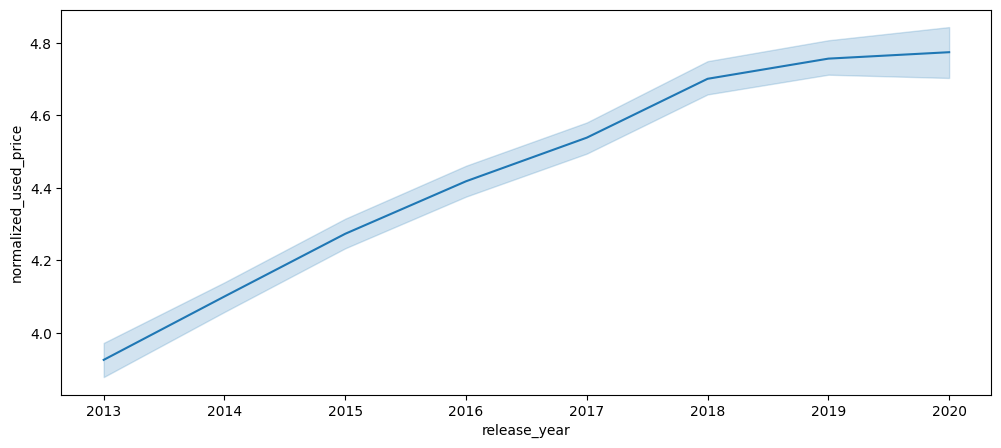

In [34]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year', y='normalized_used_price', data=df); plt.show()
plt.show()

The line plot of release_year versus normalized_used_price reveals several key insights:

* Upward Trend:
There is a noticeable upward trend as the release year increases, indicating that more recent devices tend to command higher used prices. This suggests that newer devices retain a greater portion of their value, likely due to better performance, less usage, or more desirable features.

* Depreciation Pattern:
The plot highlights a depreciation curve where older devices have lower used prices, while the value increases for more recent models. This pattern reflects the natural depreciation of technology over time.

* Relative Consistency:
The trend appears relatively smooth, implying that the used price is a consistent function of the release year. There aren’t abrupt jumps, which suggests that the market values newer technology in a predictable manner.

* Implications for Inventory:
For inventory management and pricing strategy, this relationship suggests that focusing on newer models could yield higher resale values. Conversely, older devices may require more aggressive pricing strategies to remain competitive.

Overall, the line plot underscores that the release year is a strong indicator of the normalized used price, reinforcing the idea that more recent devices tend to have a higher resale value.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

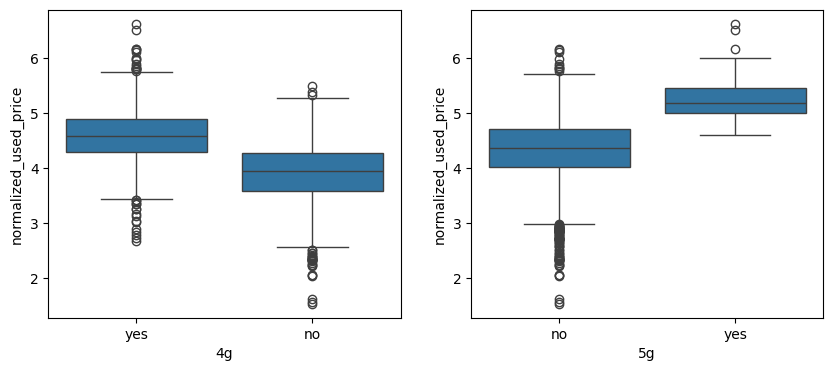

In [35]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

Based on the boxplots comparing normalized used prices for devices offering 4G versus 5G networks, several insights emerge:

* Median Price Differences:
The median price for devices with 5G connectivity is noticeably higher than that for 4G devices. This suggests that, on average, used devices equipped with 5G technology command a premium over their 4G counterparts.

* Variability and Spread:
The spread (interquartile range) of prices for 4G devices appears broader, which could indicate a wider range of models—from budget to mid-range—within the 4G category. In contrast, the 5G group shows a tighter spread, possibly reflecting a concentration of higher-end or newer models.

* Outliers:
Both categories display some outliers; however, the outliers in the 5G group are typically positioned at higher price levels. This likely represents flagship devices that, even in the used market, retain a strong value proposition due to their advanced features.

* Skewness:
The boxplots may also hint at skewness in each category. For 4G devices, a left-skew (lower whisker extended downward) might indicate that a number of older, lower-priced models are present. For 5G devices, the distribution seems to be more symmetric or slightly right-skewed, reinforcing the premium pricing trend.

Overall, these boxplots indicate that 5G-enabled devices tend to be valued higher in the used market compared to 4G devices, with a more consistent pricing structure among 5G models, while the 4G group exhibits more variability likely due to a mix of older and budget models.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

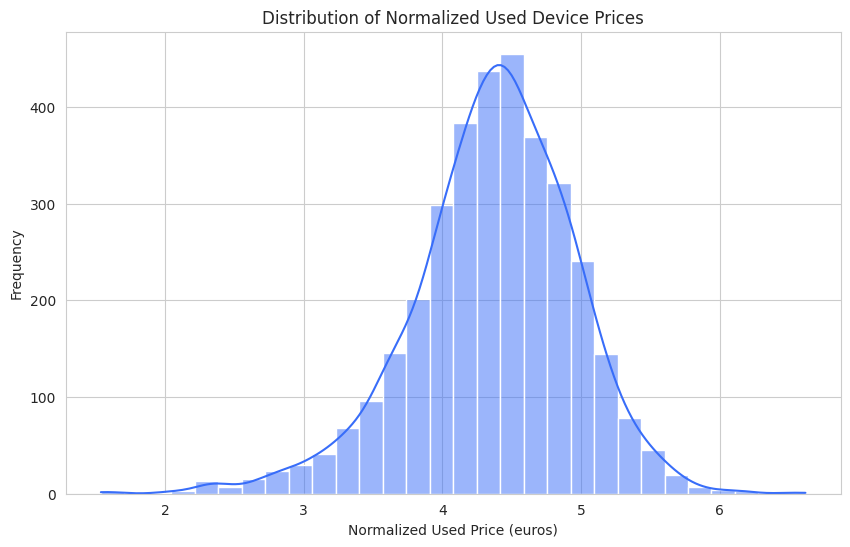

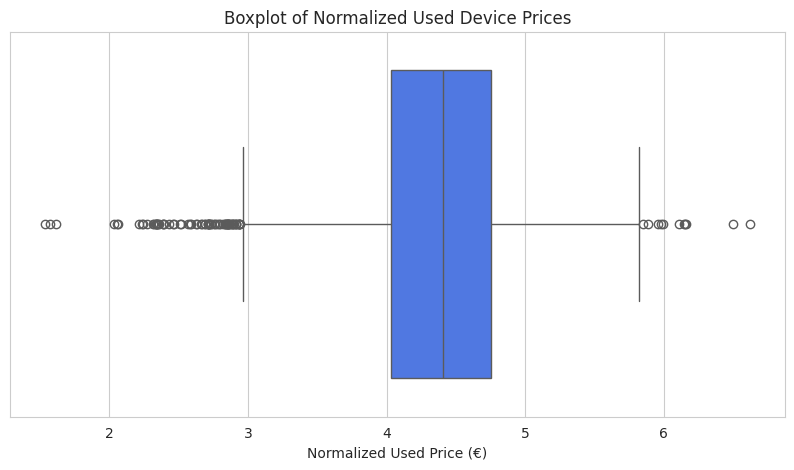

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64


In [36]:
# What does the distribution of normalized used device prices look like?

# Set plot style and palette
sns.set_style("whitegrid")
sns.set_palette("rainbow")

# Create a figure for the distribution plot
plt.figure(figsize=(10, 6))
# Plot the histogram with a KDE (kernel density estimate) for normalized used device prices
sns.histplot(df['normalized_used_price'], kde=True, bins=30)
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Used Price (euros)')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["normalized_used_price"])
plt.xlabel("Normalized Used Price (€)")
plt.title("Boxplot of Normalized Used Device Prices")
plt.show()

# Summary Statistics
print(df["normalized_used_price"].describe())

**Conclusions**:
* Central Tendency and Spread: The majority of used device prices are concentrated in a narrow range around the median. The interquartile range (IQR) suggests that most devices have prices between roughly 4.0 and 4.75, indicating a relatively consistent pricing structure among the bulk of the data.
* Unimodal Distribution with Some Skewness:
The histogram shows a clear single peak. While the central tendency is robust, there is a slight right skew — a few devices are priced notably higher than the median. This tail could represent outlier cases or a subset of higher-end models within the used market.
* Outliers Identification:
The boxplot reveals a few outliers. These are both very low or very high values relative to the bulk of the data. Further investigation into these outlier points might be warranted to understand if they represent data entry errors, unique device types, or actual market variations.
* Market Insights:
Given the concentrated distribution and the relatively small dispersion in the main cluster, it appears that most used devices in the dataset are similarly priced on a normalized scale.

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64


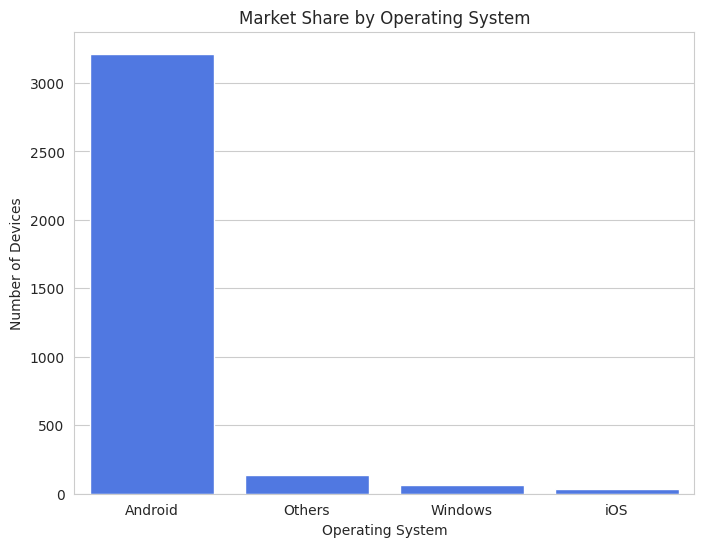

In [37]:
# What percentage of the used device market is dominated by Android devices?
sns.set_style("whitegrid")
sns.set_palette("rainbow")

# Calculate counts for each operating system
os_counts = df['os'].value_counts()
print(os_counts)

# Create a barplot to show the market share of each operating system
plt.figure(figsize=(8, 6))
sns.barplot(x=os_counts.index, y=os_counts.values)
plt.title('Market Share by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Number of Devices')
plt.show()

**Conclusion**: From this analysis, we see that the used device market is almost entirely comprised of Android devices, at over 93%.

            count      mean       std   min   25%   50%  75%   max
brand_name                                                        
Acer         51.0  3.901961  0.500196  1.00  4.00  4.00  4.0   4.0
Alcatel     121.0  3.407025  1.263730  0.25  4.00  4.00  4.0   4.0
Apple        39.0  4.000000  0.606977  2.00  4.00  4.00  4.0   6.0
Asus        122.0  4.049180  0.600997  2.00  4.00  4.00  4.0   8.0
BlackBerry   22.0  3.829545  0.799503  0.25  4.00  4.00  4.0   4.0
Celkon       33.0  1.613636  1.831891  0.25  0.25  0.25  4.0   4.0
Coolpad      22.0  3.954545  0.213201  3.00  4.00  4.00  4.0   4.0
Gionee       56.0  3.933036  0.501115  0.25  4.00  4.00  4.0   4.0
Google       15.0  4.533333  0.915475  4.00  4.00  4.00  5.0   6.0
HTC         110.0  4.000000  0.331801  3.00  4.00  4.00  4.0   6.0
Honor       116.0  4.603448  1.625232  2.00  4.00  4.00  6.0   8.0
Huawei      251.0  4.655378  1.595387  0.25  4.00  4.00  4.0  12.0
Infinix      10.0  2.600000  0.843274  2.00  2.00  2.00  3.0  

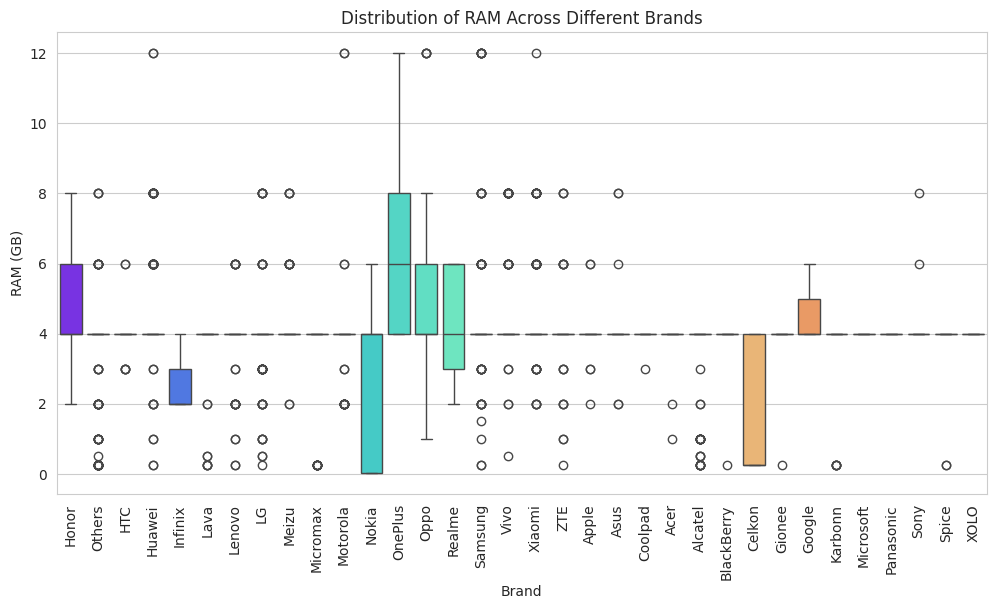

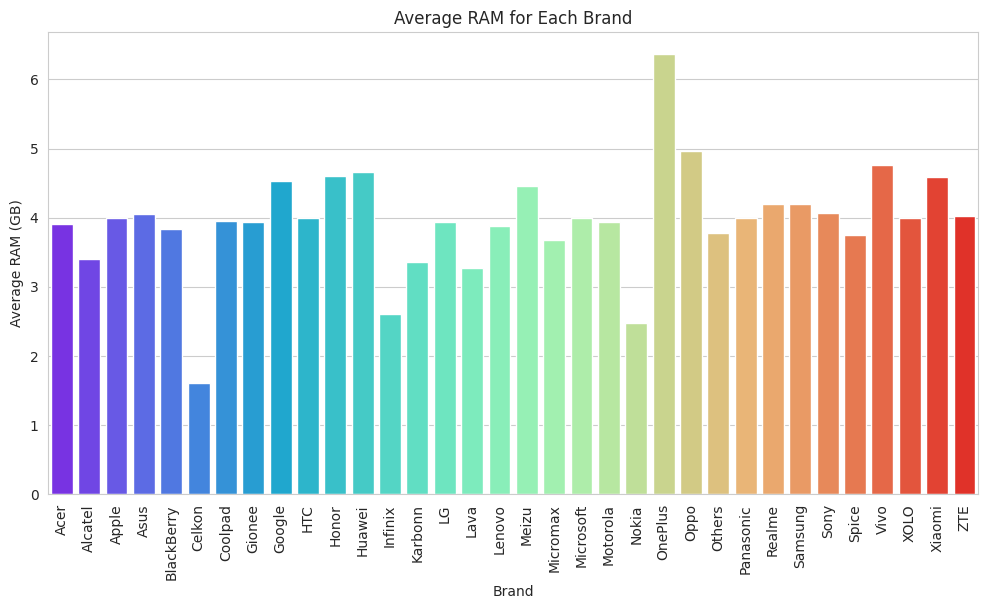

In [38]:
# How does the amount of RAM vary with the brand?
# Summarization
ram_stats = df.groupby('brand_name')['ram'].describe()
print(ram_stats)  # Show statistics like mean, min, max, etc.

# Boxplot - Shows distribution of RAM across brands
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_name', y='ram', data=df, hue='brand_name', palette="rainbow")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel("Brand")
plt.ylabel("RAM (GB)")
plt.title("Distribution of RAM Across Different Brands")
plt.show()

# Barplot - Shows average RAM per brand
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby('brand_name')['ram'].mean().index,
            y=df.groupby('brand_name')['ram'].mean().values,
            hue=df.groupby('brand_name')['ram'].mean().index,  # Assign x variable to hue
            palette="rainbow",
            legend=False)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average RAM (GB)")
plt.title("Average RAM for Each Brand")
plt.show()

**Conclusion**:
* Central Tendency Across Brands:
While the overall median RAM in the dataset is around 4 GB, a breakdown by brand shows that some brands tend to cluster very tightly around this value, whereas others might offer models with a wider range of RAM options.

* Variation in Premium vs. Budget Offerings:
Certain brands tend to offer higher RAM capacities (for example, models with 6 GB, 8 GB, or even more), suggesting a focus on performance. Conversely, brands that focus on budget devices often have a narrower distribution, centering around 4 GB or even lower.

* Spread and Outliers:
When visualized, we can see that some brands have a larger interquartile range or more pronounced outliers. This could indicate that within a single brand, there is a mix of low-end and high-end devices, possibly reflecting a broad market strategy.

* Market Positioning:
The differences in RAM distributions across brands can also signal how brands position themselves in the used/refurbished market.

Summary statistics for weight (grams) for devices with battery > 4500 mAh:
count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64


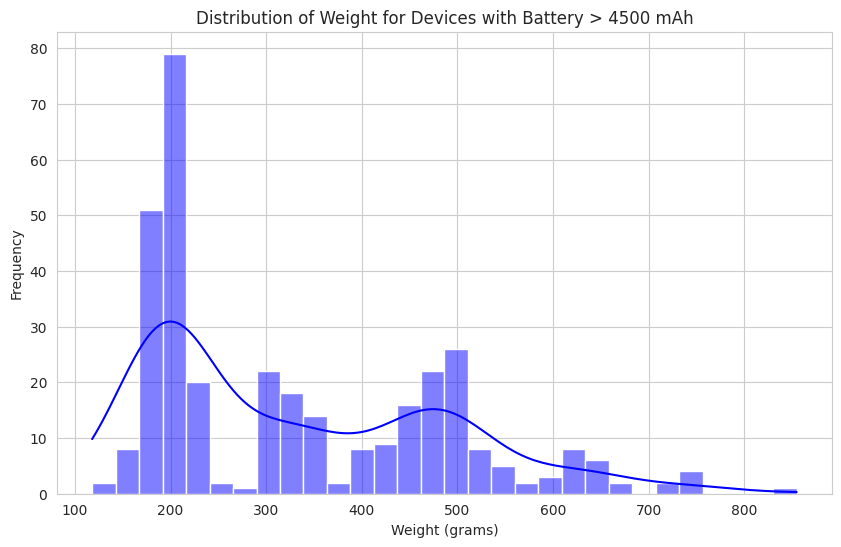

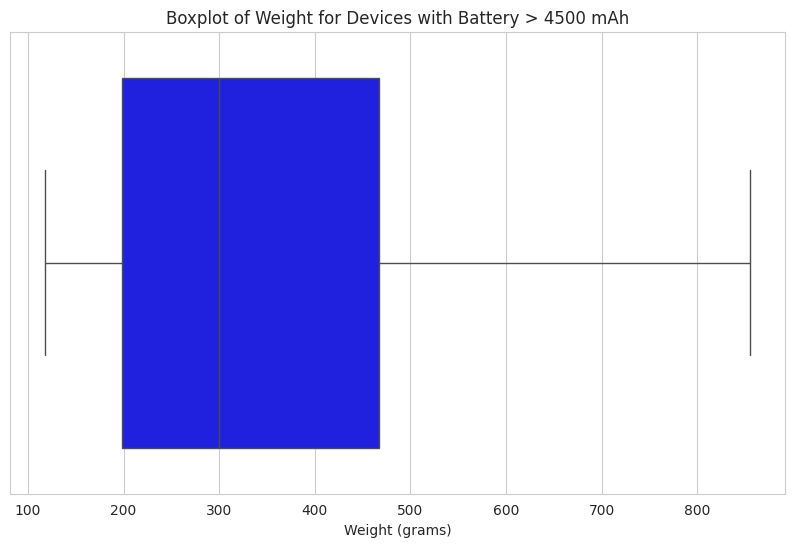

In [39]:
# How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

# Filter the data for devices with battery capacity greater than 4500 mAh
large_battery_df = df[df['battery'] > 4500]

# Display summary statistics for the weight of these devices
print("Summary statistics for weight (grams) for devices with battery > 4500 mAh:")
print(large_battery_df['weight'].describe())

# Plot a Histogram with KDE for Weight
plt.figure(figsize=(10, 6))
sns.histplot(large_battery_df['weight'], kde=True, bins=30, color='blue')
plt.title('Distribution of Weight for Devices with Battery > 4500 mAh')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

# Plot a Boxplot for Weight
plt.figure(figsize=(10, 6))
sns.boxplot(x=large_battery_df['weight'], color='blue')
plt.title('Boxplot of Weight for Devices with Battery > 4500 mAh')
plt.xlabel('Weight (grams)')
plt.show()

**Conclusion**:
* The median weight is noticeably higher than that of the overall dataset, suggesting that devices with larger batteries tend to be heavier.
* The weight distribution for devices with batteries above 4500 mAh appears unimodal with a dominant peak.
* The presence of mean greater than median, a long right tail in the histogram, and outliers in the boxplot collectively suggest positive skewness

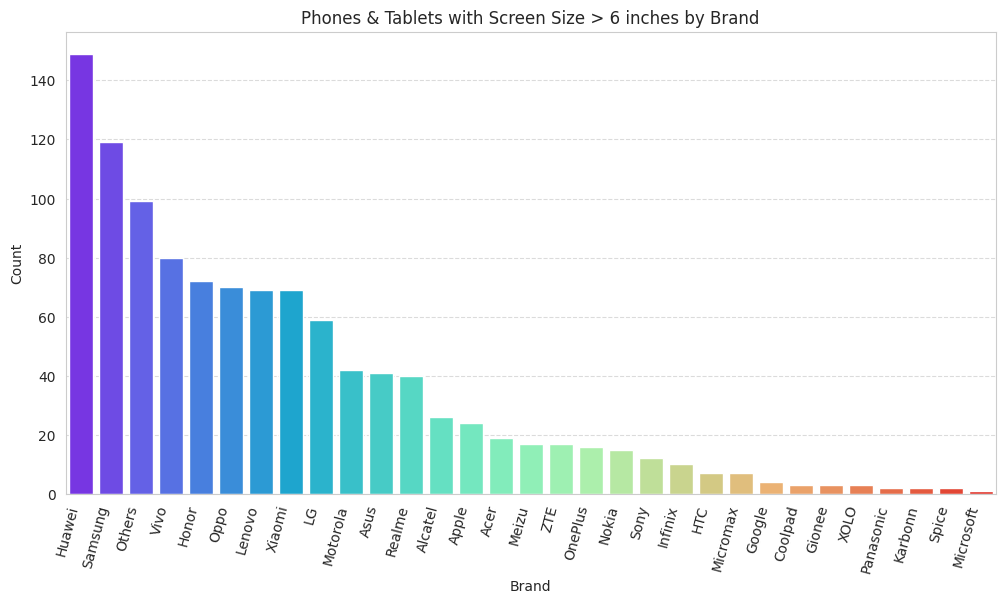

In [40]:
# How many phones and tablets are available across different brands with a screen size larger than 6 inches?

# Convert screen size from cm to inches
df["screen_size_inches"] = df["screen_size"] / 2.54  # Convert cm to inches

# Filter devices with screen size > 6 inches
filtered_df = df[df["screen_size_inches"] > 6]

# Count the number of such devices per brand
brand_counts = filtered_df["brand_name"].value_counts().reset_index()
brand_counts.columns = ["brand_name", "count"]

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot using Seaborn
sns.barplot(x="brand_name", y="count", data=brand_counts, hue="brand_name", palette="rainbow")
plt.title("Phones & Tablets with Screen Size > 6 inches by Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=75, ha="right")  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Conclusion**:
* Subset Size and Market Segment:
After filtering the data for devices with a screen size above 15.24 cm, only a fraction of the total dataset is included. This indicates that larger-screen devices—often corresponding to tablets or larger phones (phablets)—represent a specific market segment.

* Brand Representation:
When grouping this subset by brand, certain brands stand out with a higher count of large-screen devices. These brands may have a stronger presence in the tablet or phablet market. In contrast, other brands show very few devices meeting this criterion, suggesting that they focus predominantly on smaller smartphones.

* Product Strategy Implications:
The variation in counts across brands can hint at differing product strategies. Brands with more devices above 15.24 cm might be positioning themselves in the multimedia or productivity niche, where larger screens are a selling point. Conversely, brands with fewer large-screen models may concentrate on compact designs for portability.

Count of devices with >8MP selfie cameras across brands:
brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
Realme        18
OnePlus       18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
Micromax       2
BlackBerry     2
Panasonic      2
Acer           1
Name: count, dtype: int64


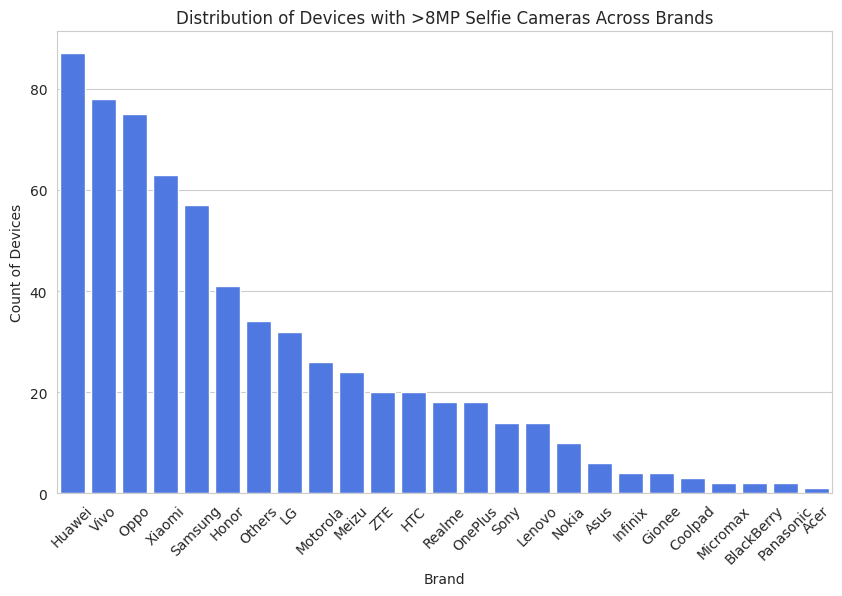

In [41]:
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?

# Filter the dataset for devices with selfie_camera_mp greater than 8
high_selfie_df = df[df['selfie_camera_mp'] > 8]

# Group by brand and count the number of devices with >8MP selfie cameras
brand_counts = high_selfie_df['brand_name'].value_counts()
print("Count of devices with >8MP selfie cameras across brands:")
print(brand_counts)

# Set Seaborn style and use the 'rainbow' palette
sns.set_style("whitegrid")
sns.set_palette("rainbow")

# Create a barplot for the distribution across brands
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Distribution of Devices with >8MP Selfie Cameras Across Brands')
plt.xlabel('Brand')
plt.ylabel('Count of Devices')
plt.xticks(rotation=45)
plt.show()

**Conclusion**:
* Concentration Across Brands:
The analysis shows that **only a subset** of the overall dataset offers devices with greater than 8MP selfie cameras. When grouped by brand, the counts indicate that a few brands dominate this segment. This concentration may suggest that these brands are positioning themselves to attract users who prioritize high-resolution selfie capabilities.

* Brand Differentiation:
Some brands have a significantly higher number of devices featuring >8MP selfie cameras compared to others. This could imply that such brands are more likely to incorporate advanced front camera technology in their models, possibly targeting consumers who value photography and video calls.

* Market Positioning Insights:
Brands with a higher count in this category may be focusing on the premium or mid-range segments where high-quality selfie cameras are a key selling point. Conversely, brands with lower counts might either not prioritize selfie camera quality or could be focusing on different market segments, such as budget devices.

Correlations with normalized_used_price:
normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size_inches       0.614785
screen_size              0.614785
battery                  0.612041
selfie_camera_mp         0.607548
main_camera_mp           0.552477
ram                      0.518783
release_year             0.509790
weight                   0.382456
int_memory               0.190954
days_used               -0.358264
Name: normalized_used_price, dtype: float64


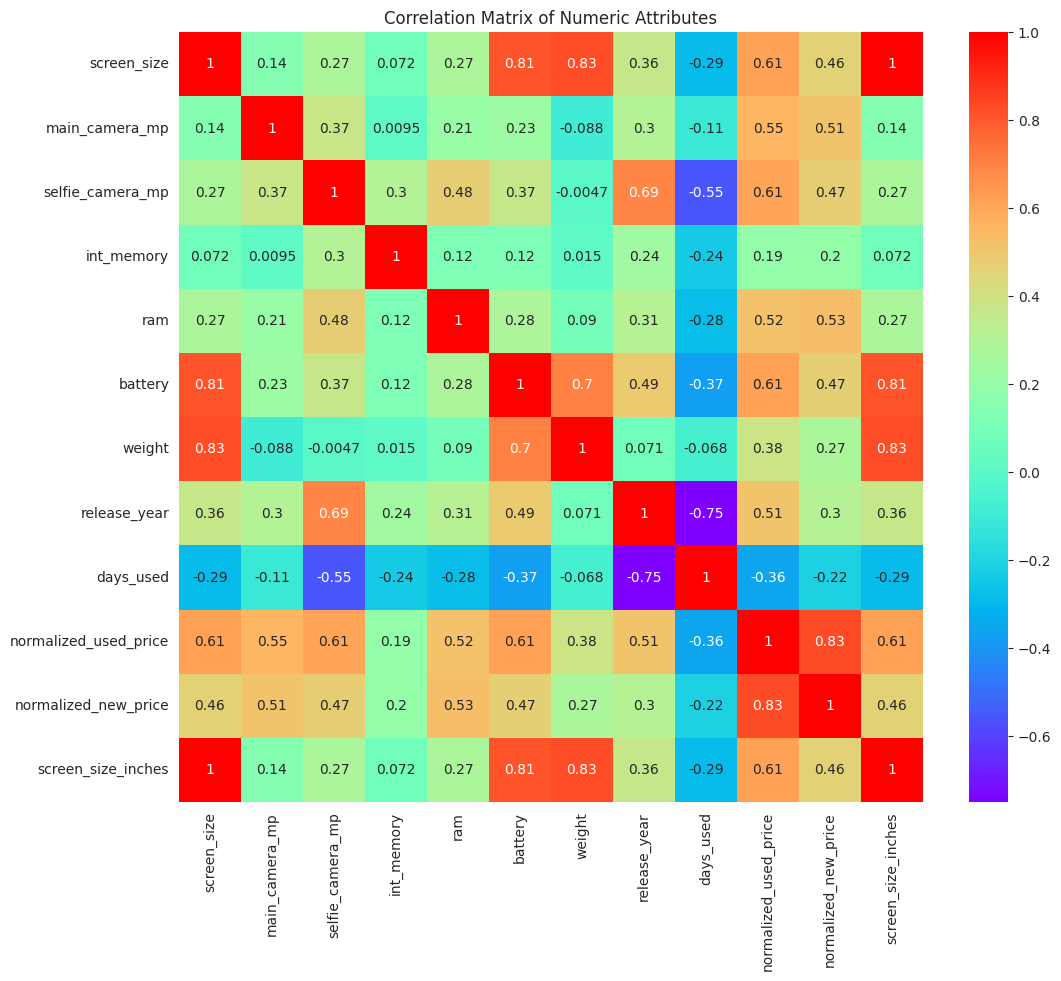

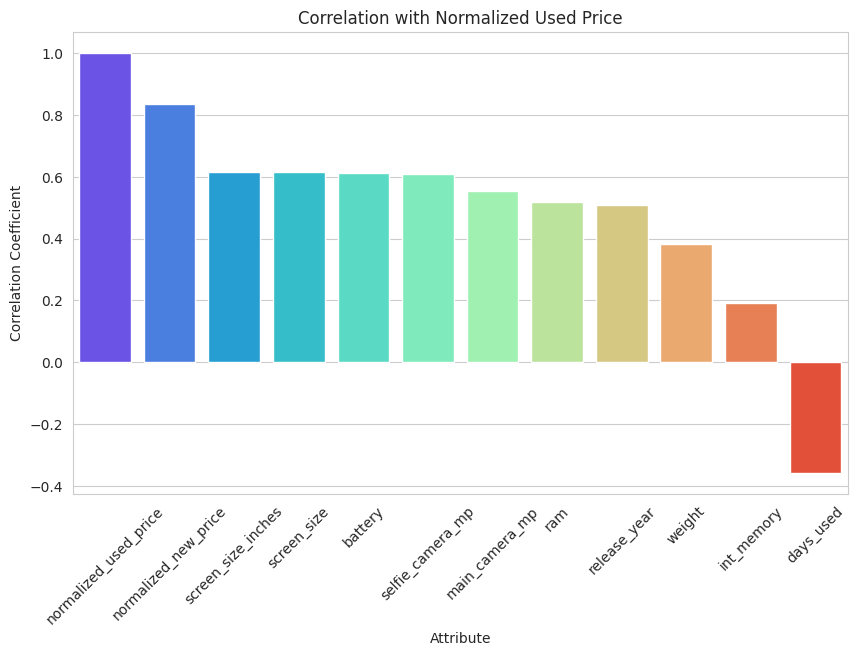

In [42]:
# Which attributes are highly correlated with the normalized price of a used device?

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric attributes
corr_matrix = numeric_df.corr()
# Extract correlations with normalized_used_price and sort them
correlations = corr_matrix['normalized_used_price'].sort_values(ascending=False)
print("Correlations with normalized_used_price:")
print(correlations)

# Create a DataFrame from the correlations for visualization
corr_df = correlations.reset_index()
corr_df.columns = ['attribute', 'correlation']

# Visualization 1: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title("Correlation Matrix of Numeric Attributes")
plt.show()

# Visualization 2: Barplot for correlations with normalized_used_price
plt.figure(figsize=(10, 6))
# Set hue to the attribute column so each bar gets its own color, and disable the legend.
ax = sns.barplot(data=corr_df, x='attribute', y='correlation', hue='attribute', dodge=False, palette='rainbow')
plt.title("Correlation with Normalized Used Price")
plt.xlabel("Attribute")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

**Conclusion**:
* Strong Correlation with New Price: The strongest correlation is observed between normalized_new_price and normalized_used_price, indicating that higher-priced new devices tend to maintain higher used prices.

* Moderate Correlations: Attributes such as release_year and days_used also show moderate correlations, suggesting that newer devices or those used for fewer days tend to have higher used prices.

* Other Attributes: Factors like battery capacity, RAM, internal memory, and camera resolutions have a weaker correlation, implying that while they do influence the used price, their effect is less significant compared to the new price.

* Implications for Modeling: This analysis points to normalized_new_price as a key predictor for modeling used device prices, with other features providing additional, albeit smaller, predictive value.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [43]:
# Treat outliers

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()


# Function to cap outliers using the IQR method
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values that fall outside the bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Apply the capping function to all numeric columns
for col in num_cols:
    df = cap_outliers(df, col)

# Check results for battery column as a sample
print("Battery column after capping outliers:")
print(df['battery'].describe())

Battery column after capping outliers:
count    3454.000000
mean     3109.694412
std      1212.463458
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      6850.000000
Name: battery, dtype: float64


In [44]:
# Missing values were already treated under the Data Overview section
# Duplicates were already dealt with under the Data Overview secion

# -------------------------------
# One-hot encode the categorigal columns to dummy variables
# -------------------------------
df_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

# Check the column names to be sure it's as expected
print(df_dummies.columns)

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'screen_size_inches',
       'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus',
       'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
       'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC',
       'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix',
       'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava',
       'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax',
       'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
       'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
       'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung',
       'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo',
       'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others',
       '

In [45]:
# Split the data

# Separate independent variables (X) and the dependent variable (y)
X = df_dummies.drop('normalized_used_price', axis=1)
y = df_dummies['normalized_used_price']

# Check if constant already exists
if 'const' not in X.columns:
    X = sm.add_constant(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert y to a NumPy array if it's a pandas Series
# This ensures both X and y have compatible data structures
if isinstance(y, pd.Series):
    y = y.to_numpy()

# Check again to be sure we have no null values
print("Null values:", df_dummies.isnull().any().any())

# Convert predictors to float to ensure they are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Null values: False
X_train shape: (2417, 49)
y_train shape: (2417,)
X_test shape: (1037, 49)
y_test shape: (1037,)


## EDA

- It is a good idea to explore the data once again after manipulating it.

### It is unclear what you are looking for here.  I cannot run visualizations using any categorical columns as these have been split out into dummy variables.  I do not recall this being covered in any of our class material, as well.  It seems unfair to ask for something that has never been covered before! This is my best guess, but I will strongly protest being marked down on this section!  Several others in the class also voiced confusion over this.  I asked for clarification in the discussion forum and on WhatsApp and did not receive an answer.  The teacher, Khalid, said to just skip this section.

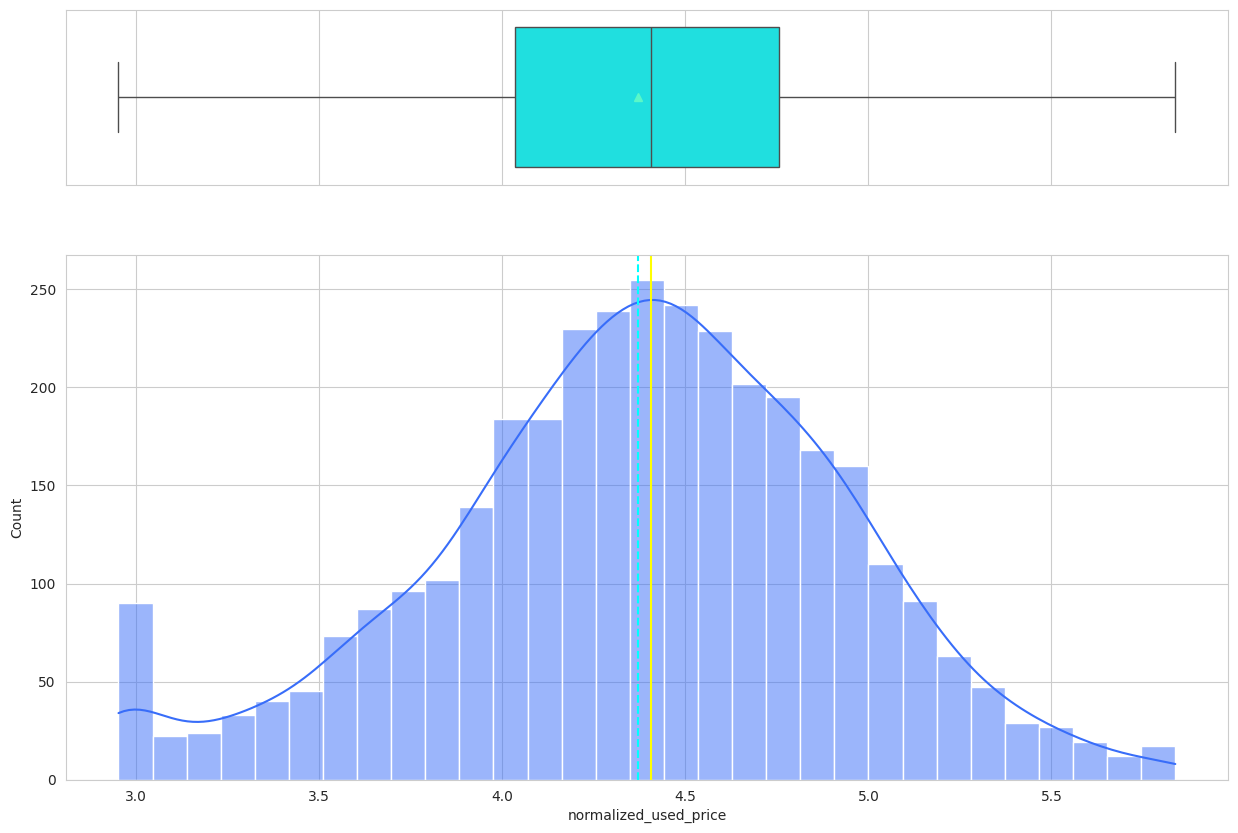

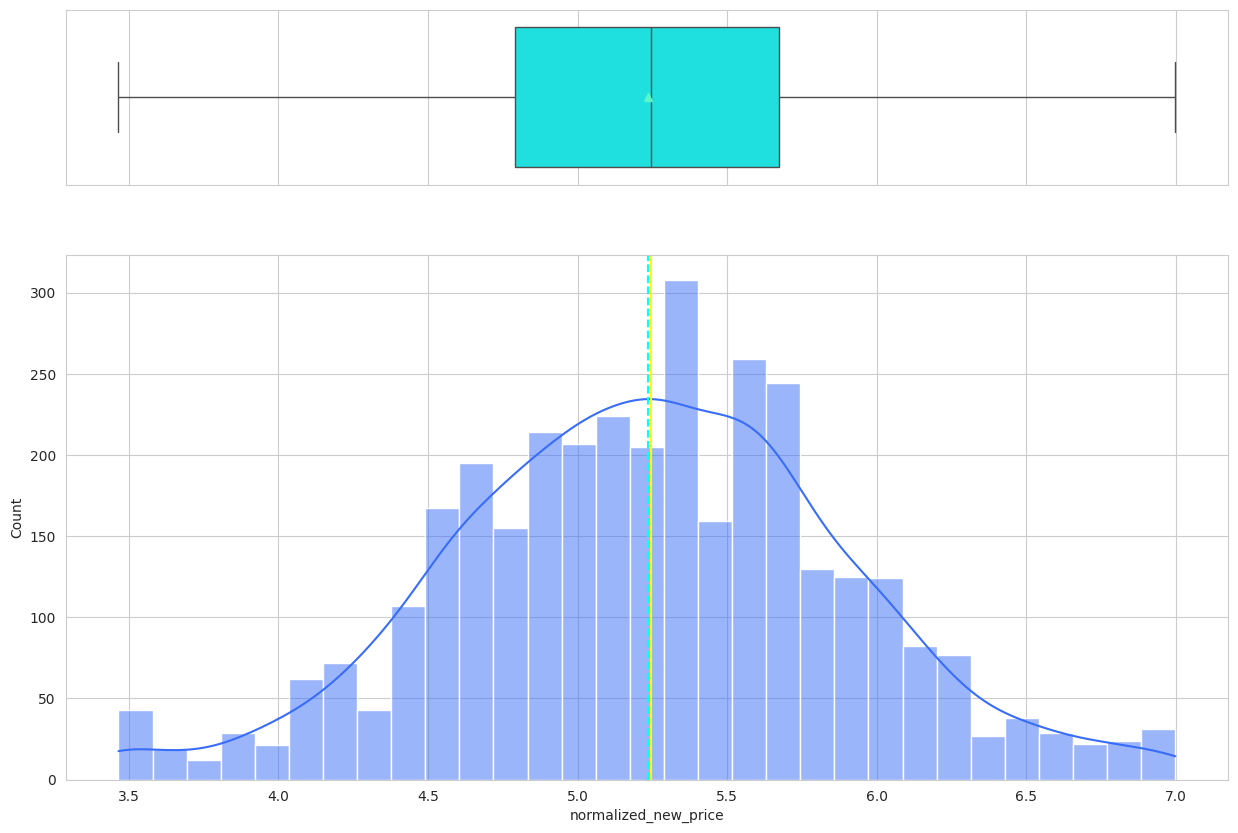

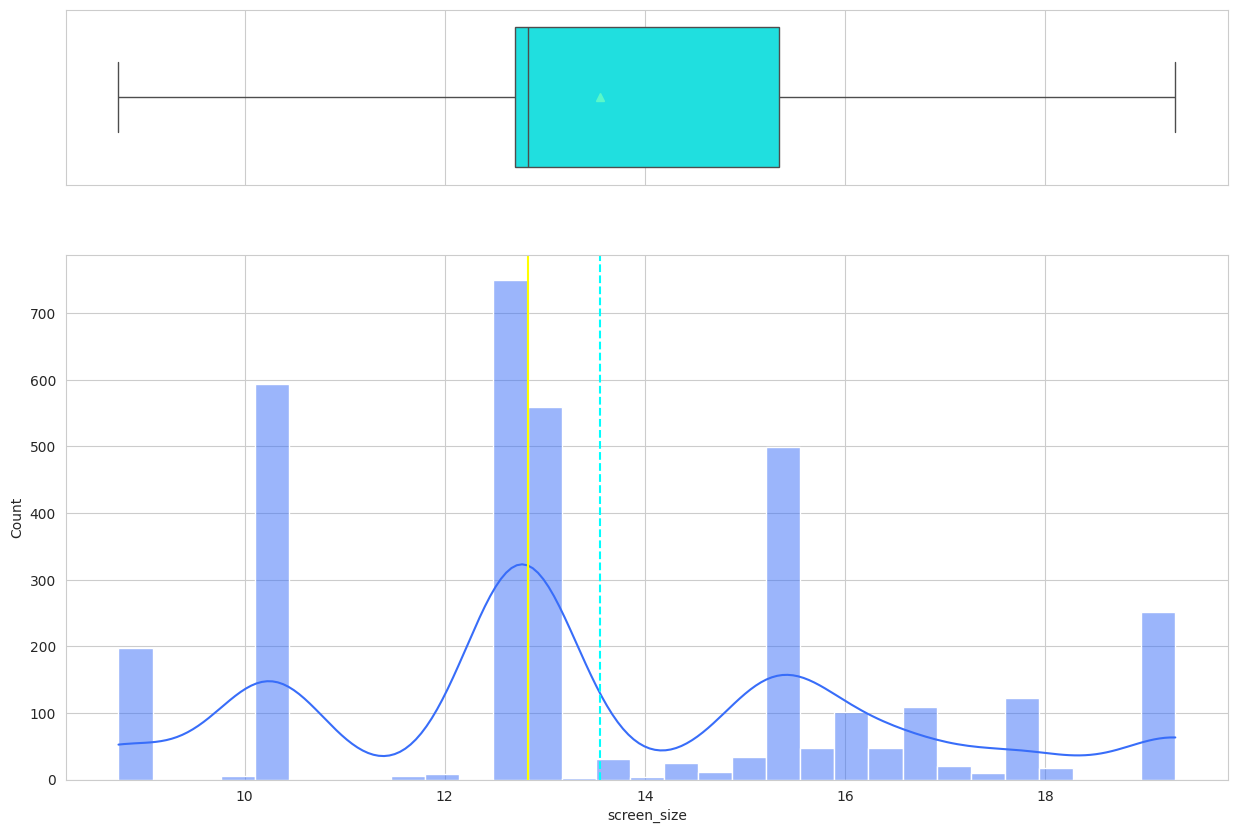

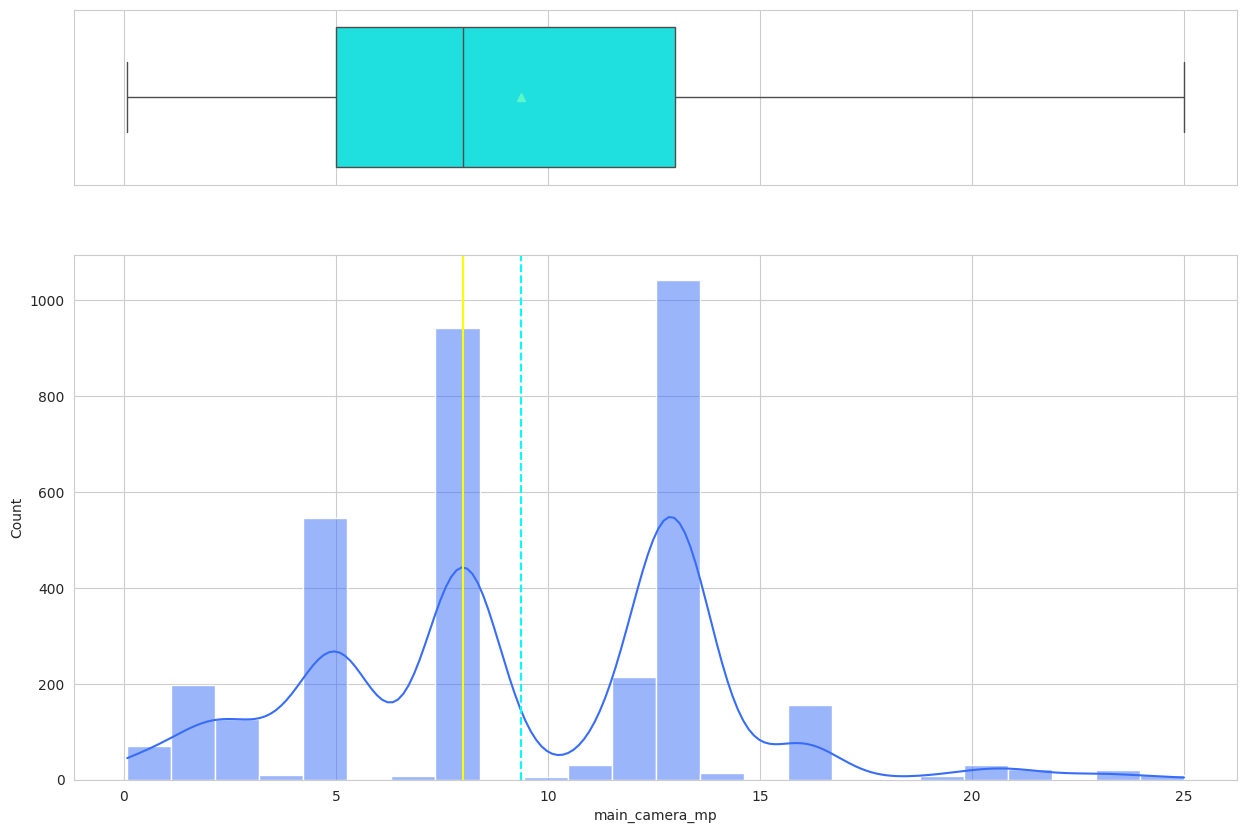

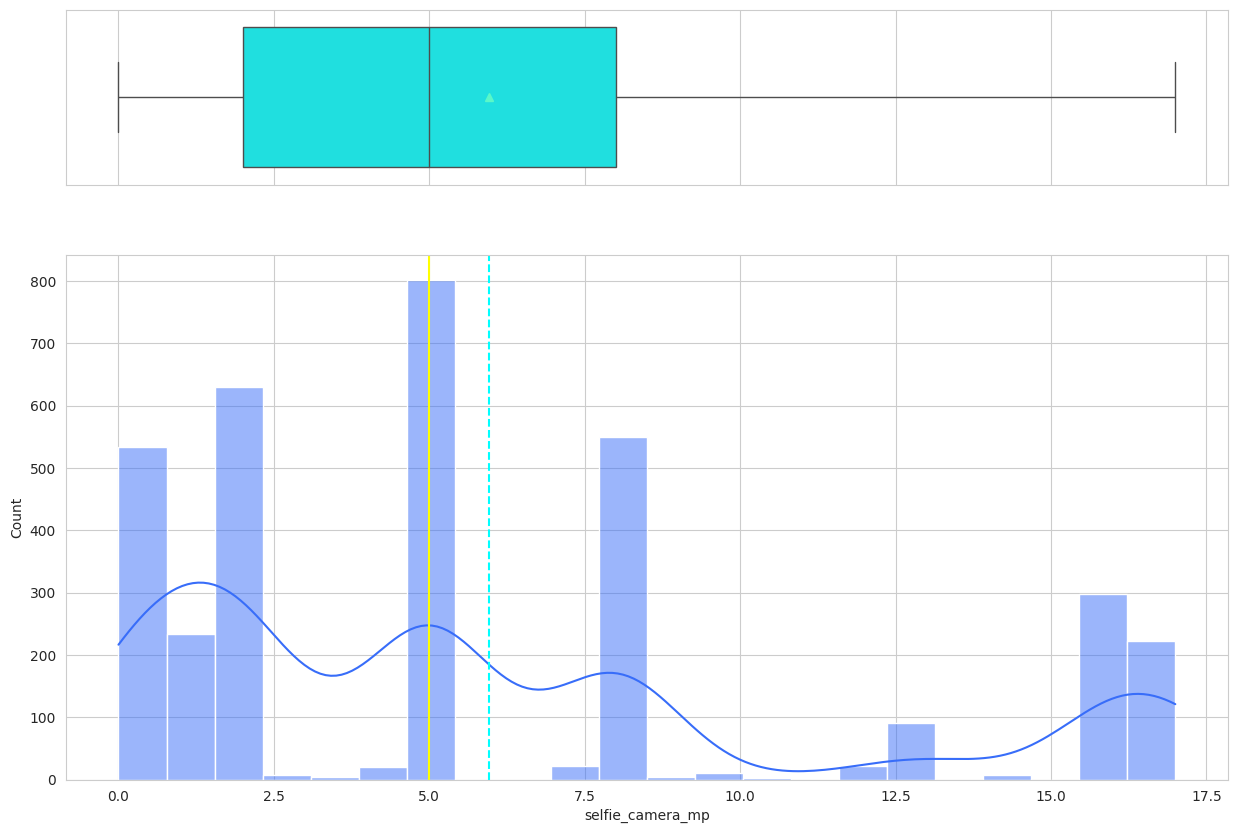

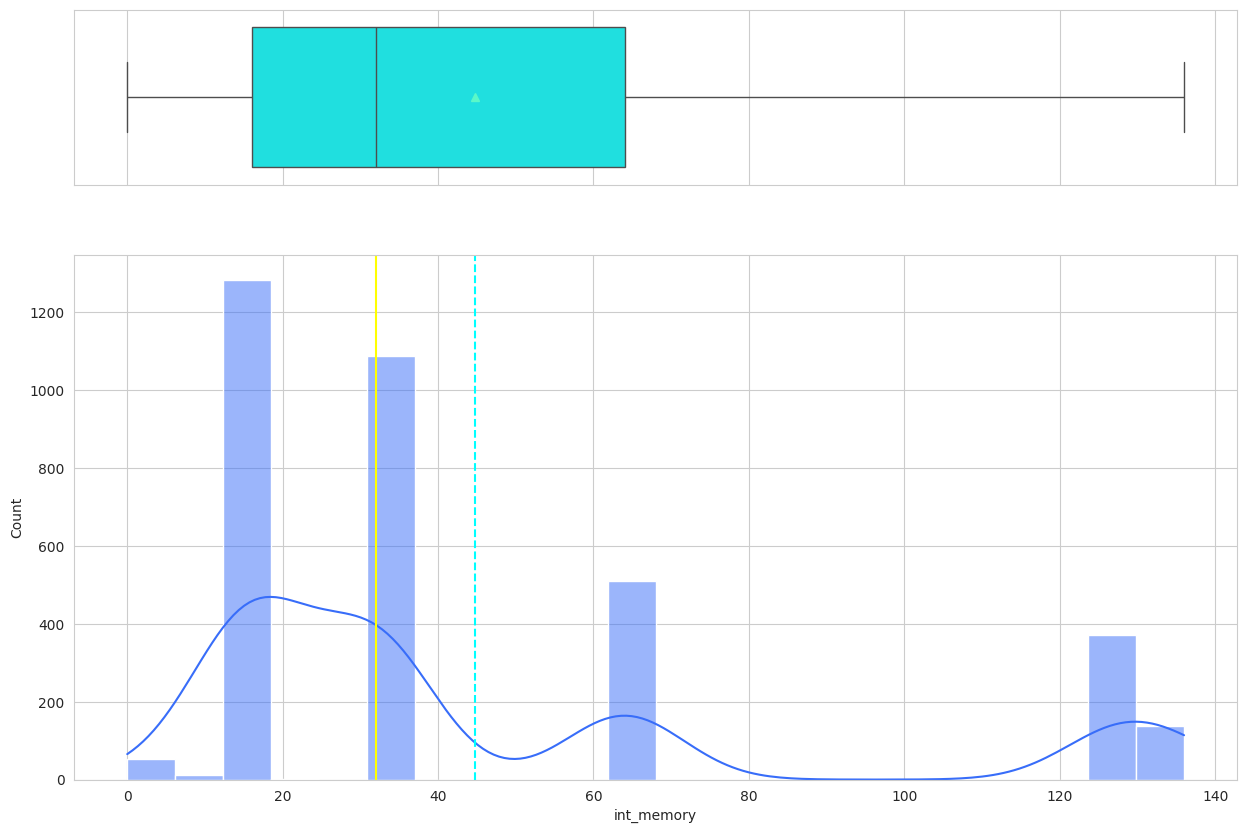

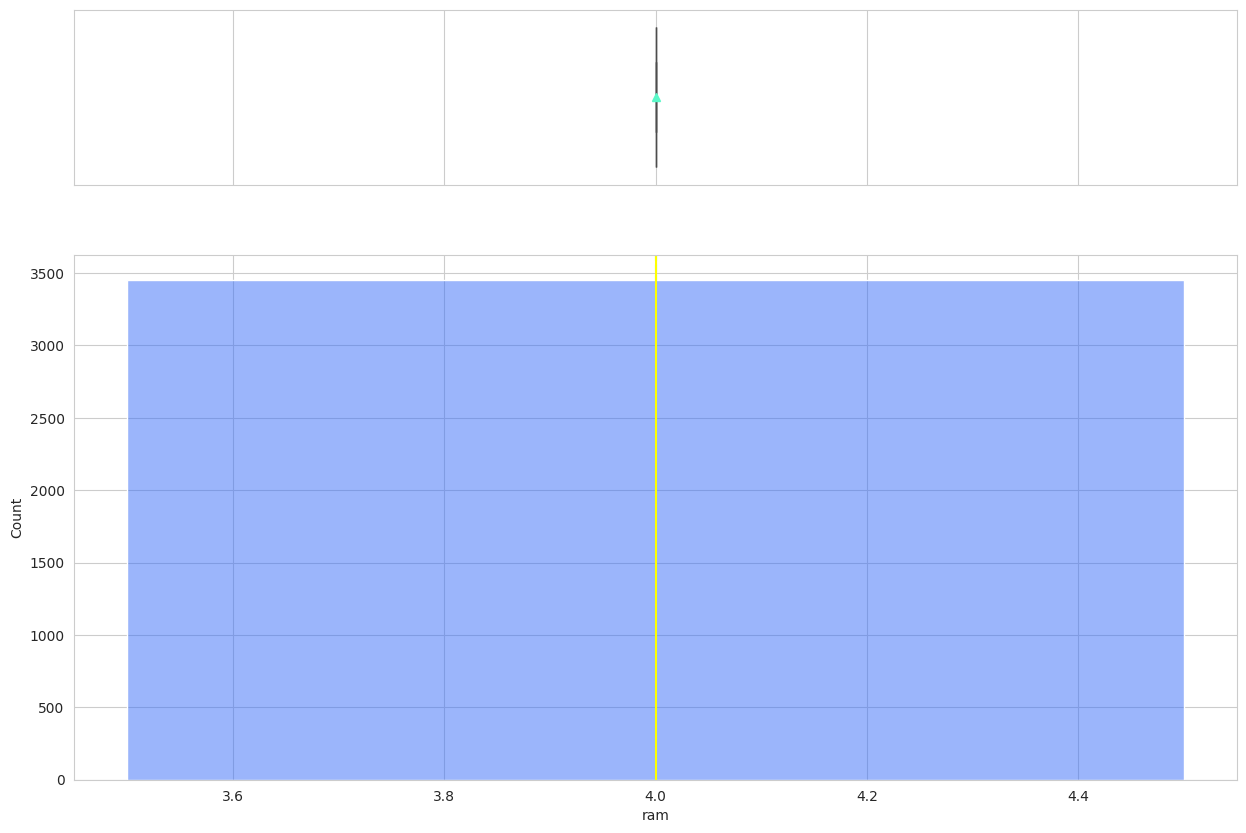

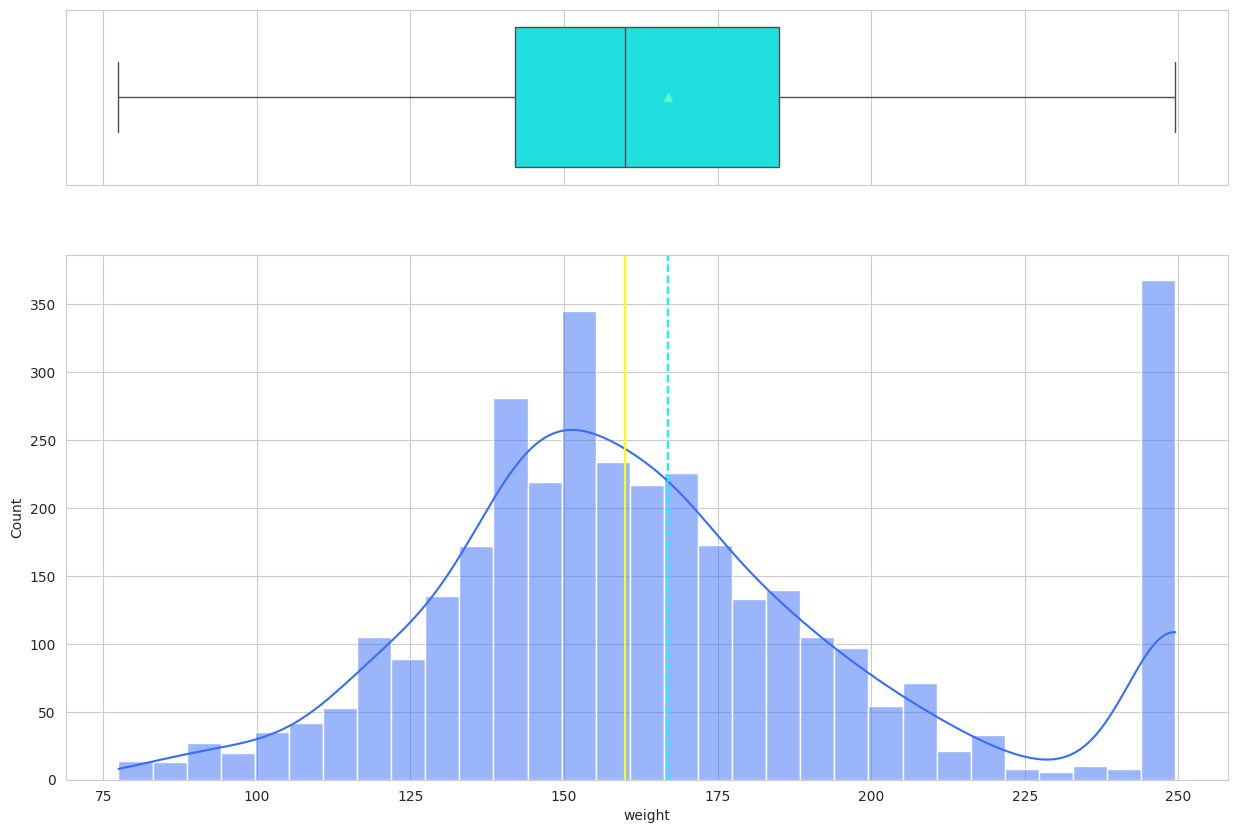

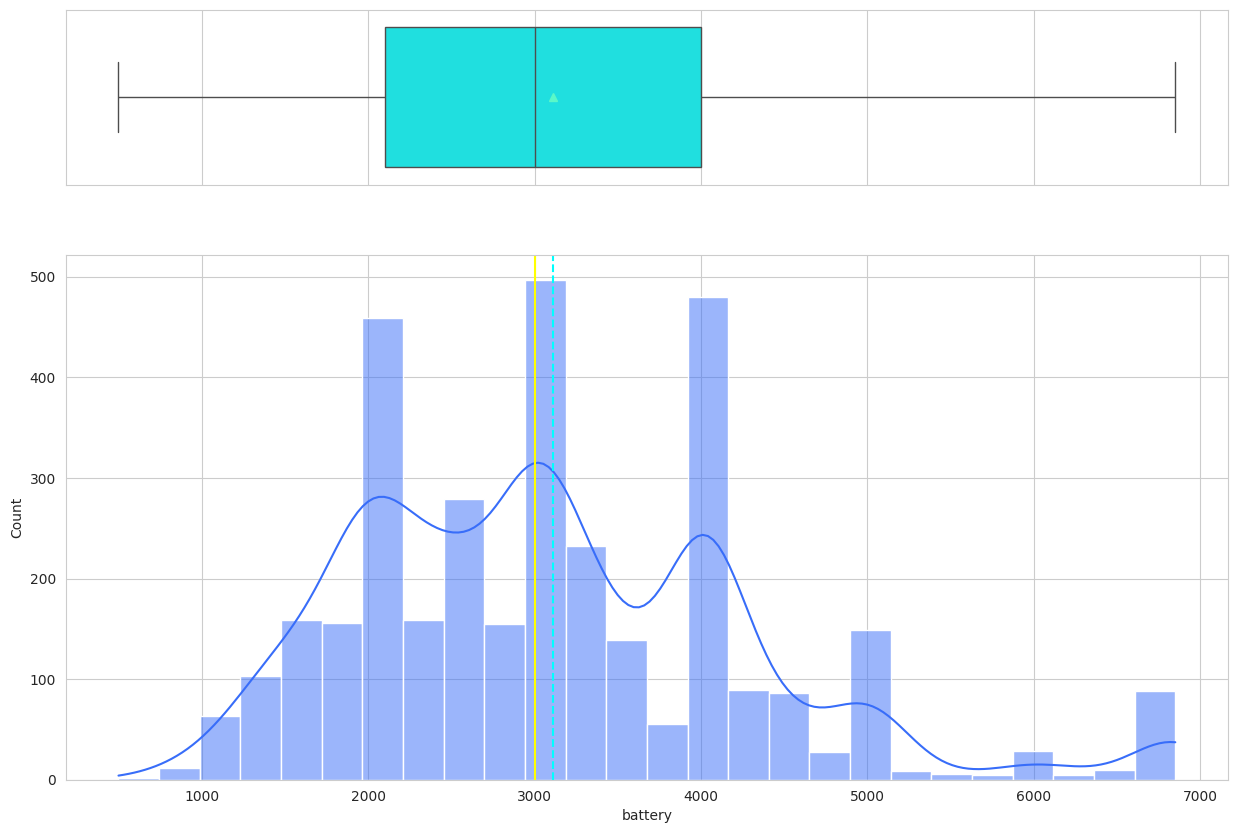

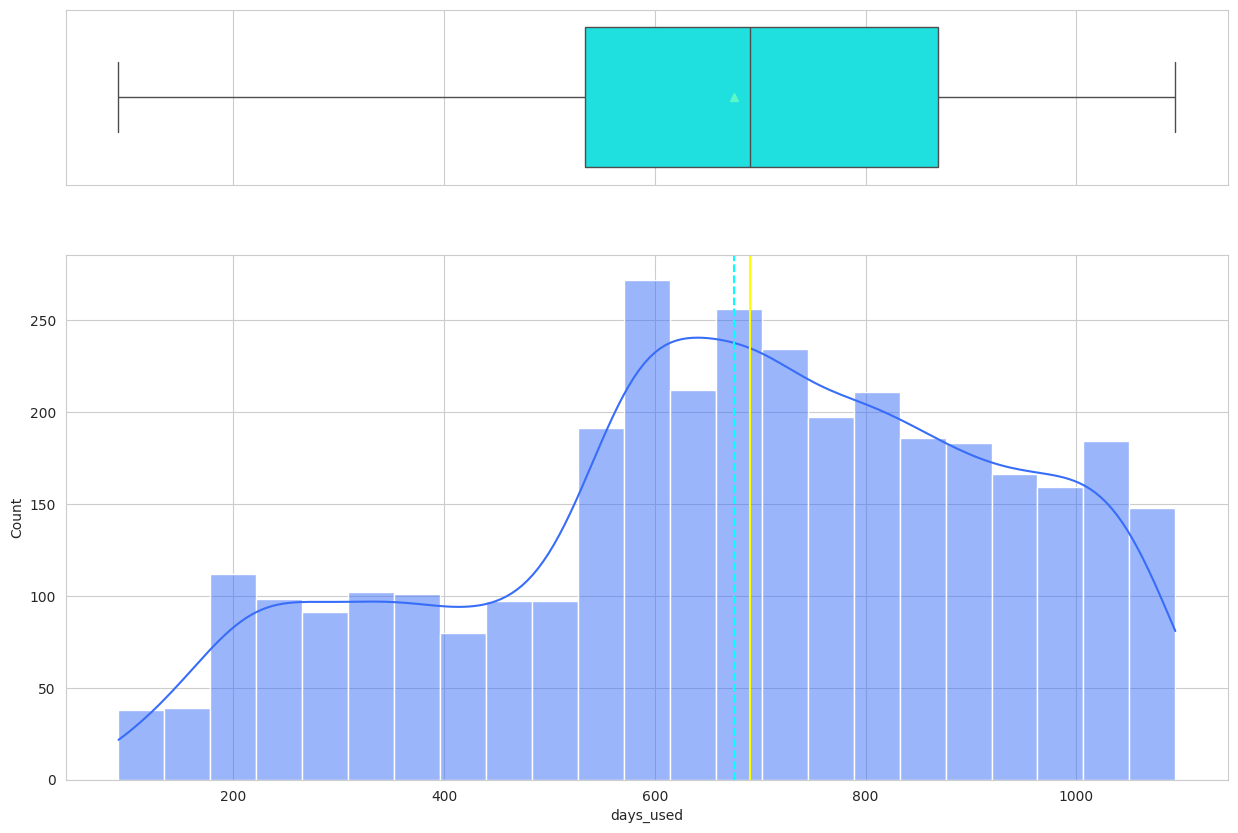

In [46]:
histogram_boxplot(df_dummies, "normalized_used_price")
histogram_boxplot(df_dummies, 'normalized_new_price')
histogram_boxplot(df_dummies, 'screen_size')
histogram_boxplot(df_dummies, 'main_camera_mp')
histogram_boxplot(df_dummies, 'selfie_camera_mp')
histogram_boxplot(df_dummies, 'int_memory')
histogram_boxplot(df_dummies, 'ram')
histogram_boxplot(df_dummies, 'weight')
histogram_boxplot(df_dummies, 'battery')
histogram_boxplot(df_dummies, 'days_used')

Capping the outliers has altered both the boxplots and histograms as expected.  The boxplots no longer show outliers, while the histogram in general have shorter tails and flatter curves.

## Model Building - Linear Regression

In [47]:
# Fit the OLS model
model1 = sm.OLS(y, X).fit()

# Print the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     390.4
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:59:07   Log-Likelihood:                 286.61
No. Observations:                3454   AIC:                            -477.2
Df Residuals:                    3406   BIC:                            -182.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.03

## Model Performance Check

In [48]:
def adjusted_r2(dep_var, pred, np):
    """
    Calculate the adjusted R-squared.
    Parameters:
    - dep_var: Dependent variable.
    - pred: array-like, independent variable values.
    - np: int, number of predictors used in the model.
    Returns:
    - adj_r2: float, the adjusted R-squared value.
    """
    n = len(dep_var)
    r2 = r2_score(dep_var, pred)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - np - 1))
    return adj_r2

# function to compute MAPE
def calculate_mape(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def regression_metrics(model, ind_var, dep_var):
    """
    Compute performance metrics for a regression model.

    Parameters:
    - model: A fitted regression model. Expected to have either:
        * `df_model` attribute (statsmodels), or
        * `coef_` attribute (scikit-learn).
    - dep_var: dependent variable.
    - ind_var: independent variables.
    Returns:
    - metrics_df: A pandas DataFrame containing R^2, Adjusted R^2, MAPE, MAE, and RMSE.
    """
    n = len(dep_var)

    # Predict using the independent variables
    pred = model.predict(ind_var)

    # Determine the number of predictors (p)
    try:
        p = int(model.df_model)
    except AttributeError:
        p = len(model.coef_) if hasattr(model, 'coef_') else 0

    # Compute metrics
    r2 = r2_score(dep_var, pred)
    r2_adj = adjusted_r2(dep_var, pred, p)
    mape = calculate_mape(dep_var, pred)
    mae = mean_absolute_error(dep_var, pred)
    rmse = np.sqrt(mean_squared_error(dep_var, pred))

    # Create a DataFrame of the metrics
    metrics_df = pd.DataFrame({
        'R_squared': [r2],
        'Adjusted_R_squared': [r2_adj],
        'MAPE': [mape],
        'MAE': [mae],
        'RMSE': [rmse]
    },
        index=[0],)

    return metrics_df

# Check model performance on train and test sets
def check_model_performance(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the performance of a regression model on training and test sets.

    Parameters:
    - model: A fitted regression model.
    - X_train: DataFrame of training predictors.
    - y_train: Series of training target values.
    - X_test: DataFrame of test predictors.
    - y_test: Series of test target values.
    """
    # Check if constant already exists
    if 'const' not in X_train.columns:
        X_train = sm.add_constant(X_train)

    # Compute the train set metrics
    train_metrics = regression_metrics(model, X_train, y_train)
    print("Model Train Performance Metrics:")
    print(train_metrics)

    ### Compute model performance on test set

    # Check if constant already exists
    if 'const' not in X_test.columns:
        X_test = sm.add_constant(X_test)

    # Reindex X_test to have the same columns as the training design matrix,
    # as stored in model.model.exog_names.
    X_test = X_test.reindex(columns=model.model.exog_names, fill_value=0)

    # Compute performance metrics on the test set using the regression_metrics function
    test_metrics = regression_metrics(model, X_test, y_test)
    print("Model Test Performance Metrics:")
    print(test_metrics)

In [49]:
check_model_performance(model1, X_train, y_train, X_test, y_test)

Model Train Performance Metrics:
   R_squared  Adjusted_R_squared      MAPE       MAE      RMSE
0    0.84321            0.840099  4.146032  0.176374  0.223633
Model Test Performance Metrics:
   R_squared  Adjusted_R_squared      MAPE       MAE      RMSE
0   0.844006            0.836593  4.130164  0.176929  0.220519




---


**Our r-square values for both the training and test data are similar, so our model does not appear to be overfit.  It is high enough that our model does not appear to be underfit, either.  We can proceed.**


---



## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied:
  1. No Multicollinearity

  2. Linearity of variables

  3. Independence of error terms

  4. Normality of error terms

  5. No Heteroscedasticity

### Remove Multicollinearity



In [50]:
import warnings

def compute_vif_with_constants(X):
    """
    Compute VIF for predictors in X while ensuring a constant is present.
    If the constant column already exists, it won't be added again.
    Columns with zero variance are temporarily dropped for VIF calculation,
    then added back with VIF = np.inf.

    Parameters:
    - X: pd.DataFrame of predictors.

    Returns:
    - vif_df: DataFrame with columns 'Feature' and 'VIF'
    """
    # Add constant unless already exists
    if 'const' not in X.columns:
        X = sm.add_constant(X)

    # Identify columns with zero variance (which cause divide by zero)
    zero_var_cols = X.columns[X.var() == 0].tolist()

    # Filter out zero-variance columns for VIF calculation
    X_filtered = X.loc[:, X.var() != 0]

    # Calculate VIF for each column in the filtered design matrix.
    vif_values = []
    for i in range(X_filtered.shape[1]):
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", RuntimeWarning)
                vif = variance_inflation_factor(X_filtered.values, i)
        except Exception as e:
            vif = np.inf
        vif_values.append(vif)

    # Create a DataFrame with VIF values for the filtered columns
    vif_df = pd.DataFrame({'Feature': X_filtered.columns, 'VIF': vif_values})

    # Add back any zero-variance columns with VIF set to infinity using pd.concat
    if zero_var_cols:
        zero_df = pd.DataFrame({'Feature': zero_var_cols, 'VIF': [np.inf] * len(zero_var_cols)})
        vif_df = pd.concat([vif_df, zero_df], ignore_index=True)

    return vif_df

# Compute all VIF
vif_df = compute_vif_with_constants(X)

# Identify columns with VIF > 5
high_vif = vif_df[vif_df['VIF'] > 5]
if not high_vif.empty:
    print("\nColumns with VIF > 5:")
    print(high_vif)
else:
    print("\nNo columns have a VIF greater than 5.")


Columns with VIF > 5:
                 Feature         VIF
0            screen_size         inf
1         main_camera_mp   12.172449
2       selfie_camera_mp    7.392710
3             int_memory    5.334924
4                battery   28.101372
5                 weight   83.499935
6           release_year  223.226537
7              days_used   16.313414
8   normalized_new_price  178.896986
9     screen_size_inches         inf
11      brand_name_Apple   14.578531
20     brand_name_Huawei    6.164807
23         brand_name_LG    5.087272
33     brand_name_Others   10.969709
36    brand_name_Samsung    7.892897
45                os_iOS   13.551858
46                4g_yes    6.663111
48                   ram         inf


In [51]:
def treating_multicollinearity(X, y, vif_threshold=5.0):
    """
    Recursively drop the predictor with the highest VIF (if above vif_threshold)
    and refit the OLS model until no predictors have a VIF greater than vif_threshold.

    Parameters:
    - X: pd.DataFrame of predictors (do not include a constant column).
    - y: pd.Series (or array-like) of the target variable.
    - vif_threshold: float, maximum acceptable VIF.

    Returns:
    - final_model: Fitted statsmodels OLS model using the reduced set of predictors (with constant).
    - X_final: The reduced DataFrame of predictors (without the constant column).
    """
    # Check if constant already exists
    if 'const' not in X.columns:
        X = sm.add_constant(X)

    # Calculate VIF for each column in X, handling errors regarding division by zero
    vif_values = []
    for i in range(X.shape[1]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", RuntimeWarning)
            try:
                vif = variance_inflation_factor(X.values, i)
            except Exception:
                vif = np.inf
        vif_values.append(vif)

    vif_df = pd.DataFrame({'Feature': X.columns, 'VIF': vif_values})

    # Exclude the constant from our VIF check
    vif_without_const = vif_df[vif_df['Feature'] != 'const']

    # Find the predictor with the highest VIF
    if not vif_without_const.empty:
        max_vif = vif_without_const['VIF'].max()
        col_to_drop = vif_without_const.loc[vif_without_const['VIF'].idxmax(), 'Feature']
    else:
        max_vif = 0

    # If the maximum VIF is above the threshold, drop that predictor and call recursively
    if max_vif > vif_threshold:
        print(f"Dropping '{col_to_drop}' with VIF = {max_vif:.2f}")
        X_new = X.drop(columns=[col_to_drop])
        return treating_multicollinearity(X_new, y, vif_threshold)
    else:
        # When no predictor has a VIF above the threshold, fit and return the final model.
        # Add the constant back if needed
        if 'const' not in X.columns:
            X = sm.add_constant(X)

        final_model = sm.OLS(y, X).fit()
        return final_model, X

In [52]:
# Treat high VIF values by recursively dropping our highest VIF column over threshold until none remain
model2, X2 = treating_multicollinearity(X, y, vif_threshold=5.0)

# Re-split the data using the reduced set of features (X2)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1)

print("\nModel-2 Performance:")
check_model_performance(model2, X_train, y_train, X_test, y_test)

Dropping 'screen_size' with VIF = inf
Dropping 'ram' with VIF = 4230523.77
Dropping 'brand_name_Apple' with VIF = 14.48
Dropping 'brand_name_Others' with VIF = 8.92
Dropping 'release_year' with VIF = 5.45
Dropping 'screen_size_inches' with VIF = 5.11

Model-2 Performance:
Model Train Performance Metrics:
   R_squared  Adjusted_R_squared      MAPE       MAE      RMSE
0   0.834721            0.831727  4.216978  0.179516  0.227152
Model Test Performance Metrics:
   R_squared  Adjusted_R_squared      MAPE       MAE      RMSE
0   0.836588            0.829511  4.301987  0.183141  0.231358


In [53]:
def drop_high_pvalues(X, y, p_threshold=0.05):
    """
    Recursively drop the predictor with the highest p-value (if above p_threshold)
    and refit the OLS model until all predictors (excluding the constant) have p-values <= p_threshold.

    Parameters:
    - X: pd.DataFrame of predictors (do not include a constant).
    - y: pd.Series (or array-like) of the target variable.
    - p_threshold: float, maximum acceptable p-value for predictors.

    Returns:
    - final_model: Fitted statsmodels OLS model that meets the p-value criterion.
    - X_final: The DataFrame of predictors (without constant) that were retained.
    """
    # Step 1: Add a constant to the predictors.
    # Check if constant already exists
    if 'const' not in X.columns:
        X_const = sm.add_constant(X)
    else:
        X_const = X.copy()

    # Step 2: Fit the OLS model.
    model = sm.OLS(y, X_const).fit()

    # Step 3: Ignore the constant and examine p-values for predictors.
    pvals = model.pvalues.drop('const', errors='ignore')

    # Step 4: Identify the predictor with the highest p-value.
    if not pvals.empty:
        max_p = pvals.max()
        predictor_to_drop = pvals.idxmax()
    else:
        max_p = 0

    # Step 5: If the highest p-value exceeds the threshold, drop that predictor and refit recursively.
    if max_p > p_threshold:
        print(f"Dropping '{predictor_to_drop}' with p-value {max_p:.4f}")
        X_new = X.drop(columns=[predictor_to_drop])
        return drop_high_pvalues(X_new, y, p_threshold)
    else:
        # Step 6: No predictors exceed the p-value threshold; return the current model.
        return model, X

In [54]:
# Assuming X is your predictors DataFrame (without a constant) and y is your target variable.
model3, X3 = drop_high_pvalues(X, y, p_threshold=0.05)

# Re-split the data using the reduced set of features
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=1)

print("\nModel-3 Performance:")
check_model_performance(model3, X_train, y_train, X_test, y_test)

Dropping 'brand_name_Lava' with p-value 0.9563
Dropping 'brand_name_HTC' with p-value 0.8936
Dropping 'brand_name_Samsung' with p-value 0.9252
Dropping 'os_Others' with p-value 0.8996
Dropping 'brand_name_Meizu' with p-value 0.8633
Dropping 'brand_name_Panasonic' with p-value 0.7788
Dropping 'brand_name_BlackBerry' with p-value 0.6966
Dropping 'brand_name_Infinix' with p-value 0.6532
Dropping 'brand_name_Lenovo' with p-value 0.6316
Dropping 'brand_name_Coolpad' with p-value 0.6329
Dropping 'brand_name_XOLO' with p-value 0.5198
Dropping 'brand_name_Gionee' with p-value 0.5268
Dropping 'brand_name_ZTE' with p-value 0.5539
Dropping 'brand_name_Honor' with p-value 0.5983
Dropping 'brand_name_Micromax' with p-value 0.5569
Dropping 'brand_name_Karbonn' with p-value 0.5891
Dropping 'brand_name_Spice' with p-value 0.5137
Dropping 'brand_name_Google' with p-value 0.4541
Dropping 'os_Windows' with p-value 0.4278
Dropping 'brand_name_Alcatel' with p-value 0.4128
Dropping 'brand_name_Others' with 

### Test for Linearity and Independence

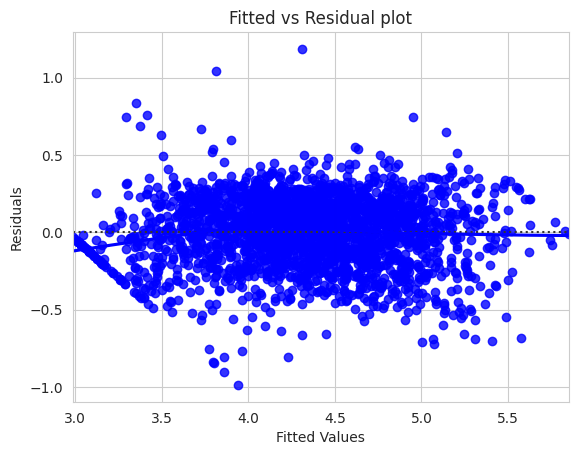

In [55]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = model3.fittedvalues  # predicted values
df_pred["Residuals"] = model3.resid  # residuals

df_pred.head()

# let's plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Because there is no apparent pattern in the graph, we can say that the model is linear.  No further calculations are needed to adjust the data.

### Test for Normality

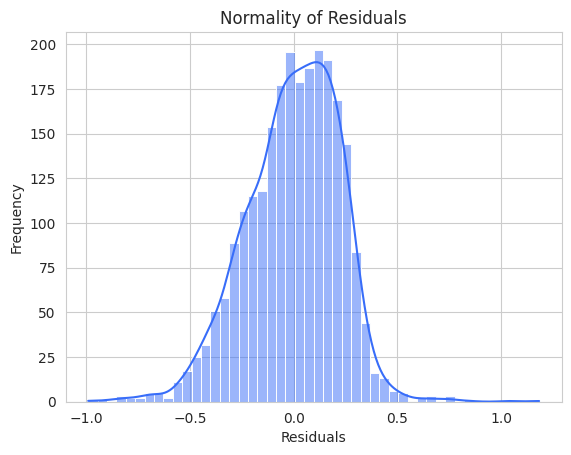

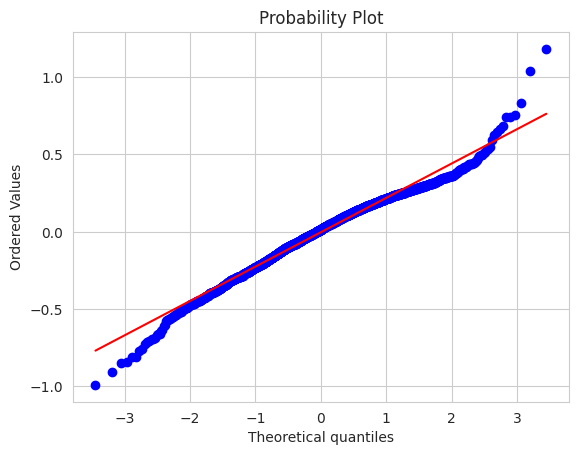

Statistics=0.984, p=0.000


In [56]:
sns.histplot(data=df_pred, x='Residuals', kde=True)
plt.title("Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Calculate the QQ plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

# Calculate Shapiro-Wilks
stat, p = stats.shapiro(df_pred["Residuals"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

**Although the results are not perfectly normal, they are close enough for this approximation.**

### Test for Homoscedasticity

In [57]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], df_pred[['Fitted Values']])
lzip(name, test)

[('F statistic', np.float64(0.8832219041535072)),
 ('p-value', np.float64(0.984473207221954))]

**Since our p-value is greater than 0.05, we can say that the residuals are homoscedastic**

## Final Model

In [58]:
print("\nFinal Model Performance:")
check_model_performance(model3, X_train, y_train, X_test, y_test)


Final Model Performance:
Model Train Performance Metrics:
   R_squared  Adjusted_R_squared      MAPE     MAE      RMSE
0   0.841541            0.840617  4.123611  0.1758  0.222417
Model Test Performance Metrics:
   R_squared  Adjusted_R_squared     MAPE       MAE      RMSE
0   0.843305            0.841158  4.23228  0.180305  0.226553


## Actionable Insights and Recommendations

1. Influence of New Price:

* Insight: The correlation coefficient for "normalized_new_price" is positive and statistically significant. This indicates that devices with higher new prices tend to have higher used prices.

* Recommendation: Focus your inventory on higher-end devices where the new price is high, as they retain more value in the used market.

2. Effect of Usage (Days Used):

* Insight: The coefficient for "days_used" is negative and significant, meaning that as a device is used for more days, its used price declines.

* Recommendation: Implement strategies that minimize the usage duration before resale—such as faster refurbishment cycles—to preserve value.

3. Impact of Release Year:

* Insight: A significant coefficient on "release_year" suggests that newer models perform better in the used market.

* Recommendation: Consider prioritizing more recent models for resale, and adjust pricing strategies to reflect the age of the devices.

4. Technical Specifications:

* Insight: Other predictors, such as battery capacity, RAM, internal memory, and camera resolutions, also showed a high correlation with price. For example, a higher battery capacity would be associated with a premium in the used price.

* Recommendation: Highlight key specifications in marketing materials and price competitively for devices that exceed standard technical benchmarks.

5. Model Fit and Diagnostics:

* Insight: Since R² and Adjusted R² are high, it suggests that the model explains a large portion of the variability in used prices.

* Recommendation: Continuously monitor model diagnostics (e.g., residual plots, heteroscedasticity tests) and consider additional variables or transformations to improve the model's predictive power.

___